<a href="https://colab.research.google.com/github/Bca72/Computer-Vision-Project-Overview/blob/more_data/Copy_of_YOLOv8_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

  <a href="https://ultralytics.com/yolov8" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [हिन्दी](https://docs.ultralytics.com/hi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://console.paperspace.com/github/ultralytics/ultralytics"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"/></a>
  <a href="https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov8"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>

Welcome to the Ultralytics YOLOv8 🚀 notebook! <a href="https://github.com/ultralytics/ultralytics">YOLOv8</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. This notebook serves as the starting point for exploring the various resources available to help you get started with YOLOv8 and understand its features and capabilities.

YOLOv8 models are fast, accurate, and easy to use, making them ideal for various object detection and image segmentation tasks. They can be trained on large datasets and run on diverse hardware platforms, from CPUs to GPUs.

We hope that the resources in this notebook will help you get the most out of YOLOv8. Please browse the YOLOv8 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/112.6 GB disk)


Changing the labels from Degree1-8 and mapping them to unripe, ripe, overripe and rotten instead.

In [ ]:
import os

#DONT RUN AGAIN UNLESS USING OLD DATASET

# path to labels folder
base_dir = r"C:\Users\uasmi\Desktop\IAT 360\Banana Project\ComputerVision\datasets\bananas\labels"
print(f"Looking for labels in: {base_dir}")

splits = ["train", "val", "test"]

# Old class → New class mapping
mapping = {
    0: 0,  # degree1 -> unripe
    1: 0,  # degree2 -> unripe
    2: 1,  # degree3 -> ripe
    3: 1,  # degree4 -> ripe
    4: 1,  # degree5 -> ripe
    5: 2,  # degree6 -> overripe
    6: 2,  # degree7 -> overripe
    7: 3   # degree8 -> rotten
}

for split in splits:
    label_dir = os.path.join(base_dir, split)
    if not os.path.exists(label_dir):
        print(f"Skipping missing folder: {label_dir}")
        continue

    print(f"Processing {label_dir}...")
    for filename in os.listdir(label_dir):
        if filename.endswith(".txt"):
            filepath = os.path.join(label_dir, filename)
            with open(filepath, "r") as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) > 0:
                    old_class = int(parts[0])
                    if old_class in mapping:
                        parts[0] = str(mapping[old_class])
                        new_lines.append(" ".join(parts))

            # Overwrite file with updated labels
            with open(filepath, "w") as f:
                f.write("\n".join(new_lines))

print("✅ All label files updated successfully!")




Looking for labels in: C:\Users\uasmi\Desktop\IAT 360\Banana Project\ComputerVision\datasets\bananas\labels
Skipping missing folder: C:\Users\uasmi\Desktop\IAT 360\Banana Project\ComputerVision\datasets\bananas\labels/train
Skipping missing folder: C:\Users\uasmi\Desktop\IAT 360\Banana Project\ComputerVision\datasets\bananas\labels/val
Skipping missing folder: C:\Users\uasmi\Desktop\IAT 360\Banana Project\ComputerVision\datasets\bananas\labels/test
✅ All label files updated successfully!


# 1. Train

<p align=""><a href="https://bit.ly/ultralytics_hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png"/></a></p>

Train YOLOv8 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLOv8 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [20]:
# Train YOLOv8n for 20 epochs
#after testing 20 seems to work best
!yolo detect train model=yolov8n.pt data= /content/drive/MyDrive/ComputerVision/datasets/bananas/data.yaml epochs=20 imgsz=640

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/ComputerVision/datasets/bananas/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100

# 2. Val
Validate a model's accuracy on the [COCO](https://docs.ultralytics.com/datasets/detect/coco/) dataset's `val` or `test` splits. The latest YOLOv8 [models](https://github.com/ultralytics/ultralytics#models) are downloaded automatically the first time they are used. See [YOLOv8 Val Docs](https://docs.ultralytics.com/modes/val/) for more information.

In [22]:
# Validate YOLOv8n on val files
!yolo detect val model=/content/runs/detect/train4/weights/best.pt data=/content/drive/MyDrive/ComputerVision/datasets/bananas/data.yaml

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 1.0±0.7 ms, read: 22.5±16.9 MB/s, size: 54.3 KB)
val: Scanning /content/drive/MyDrive/ComputerVision/datasets/bananas/labels/val.cache... 263 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 263/263 3.3Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 287. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 17/17 2.5it/s 6.9s
                   all        263        287      0.798       0.77      0.838      0.656
                unripe         75         99      0.841      0.586      0.711      0.529
              

# 3. Test

YOLOv8 can train, val, predict and export models for the most common tasks in vision AI: [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/). See [YOLOv8 Tasks Docs](https://docs.ultralytics.com/tasks/) for more information.

<br><img width="1024" src="https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png">


## 1. Detection

YOLOv8 _detection_ models have no suffix and are the default YOLOv8 models, i.e. `yolov8n.pt` and are pretrained on COCO. See [Detection Docs](https://docs.ultralytics.com/tasks/detect/) for full details.


In [23]:
#Test the model on all the test images
!yolo detect val \
    model=/content/runs/detect/train4/weights/best.pt \
    data=/content/drive/MyDrive/ComputerVision/datasets/bananas/data.yaml \
    split=test \
    project=/content/runs/detect \
    name=test

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.3 ms, read: 77.5±87.8 MB/s, size: 364.0 KB)
val: Scanning /content/drive/MyDrive/ComputerVision/datasets/bananas/labels/test.cache... 60 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 60/60 536.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.9it/s 4.7s
                   all         60         80      0.404      0.571       0.47      0.305
                unripe         13         15       0.35      0.789      0.598      0.392
                  ripe         22         23      0.378      0.826       0.45      0.297
              overripe         26         29      0.423      0.069      0.381      0.214
                rotten         13         13      0.464        0.6      0.452      0.316
Speed: 7.1ms prepr

In [24]:
# Predict with the model with an image
!yolo detect predict \
    model=/content/runs/detect/train4/weights/best.pt \
    source='/content/drive/MyDrive/ComputerVision/datasets/bananas/images/test/0_bananas.webp' \
    conf=0.05 \
    save=True save_txt=True save_conf=True

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/ComputerVision/datasets/bananas/images/test/0_bananas.webp: 448x640 1 unripe, 2 ripes, 48.2ms
Speed: 4.7ms preprocess, 48.2ms inference, 2.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict4
1 label saved to /content/runs/detect/predict4/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


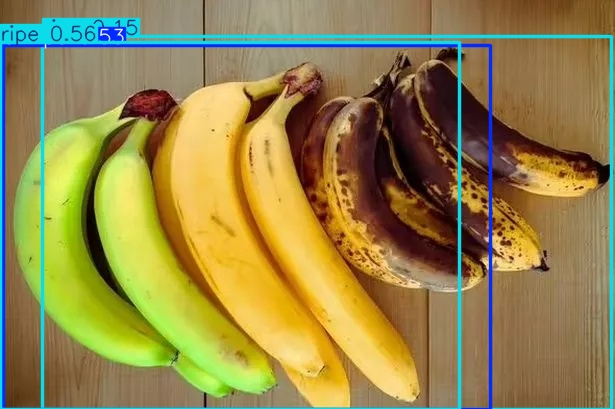

In [25]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict4/0_bananas.jpg')

In [26]:
# Print the labels for a test image
with open('/content/runs/detect/predict4/labels/0_bananas.txt', 'r') as f:
    print(f.read())

1 0.373869 0.551549 0.746237 0.896901 0.557133
0 0.402045 0.555166 0.79255 0.889669 0.534721
1 0.531571 0.544565 0.924703 0.910869 0.150302



In [27]:
# Predict with the model with an image
!yolo detect predict \
    model=/content/runs/detect/train4/weights/best.pt \
    source='/content/drive/MyDrive/ComputerVision/datasets/bananas/images/test/c5522058ca0e445e964eb0f5500a1372.jpg' \
    conf=0.05 \
    save=True save_txt=True save_conf=True

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/ComputerVision/datasets/bananas/images/test/c5522058ca0e445e964eb0f5500a1372.jpg: 384x640 1 ripe, 50.7ms
Speed: 3.3ms preprocess, 50.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict5
1 label saved to /content/runs/detect/predict5/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


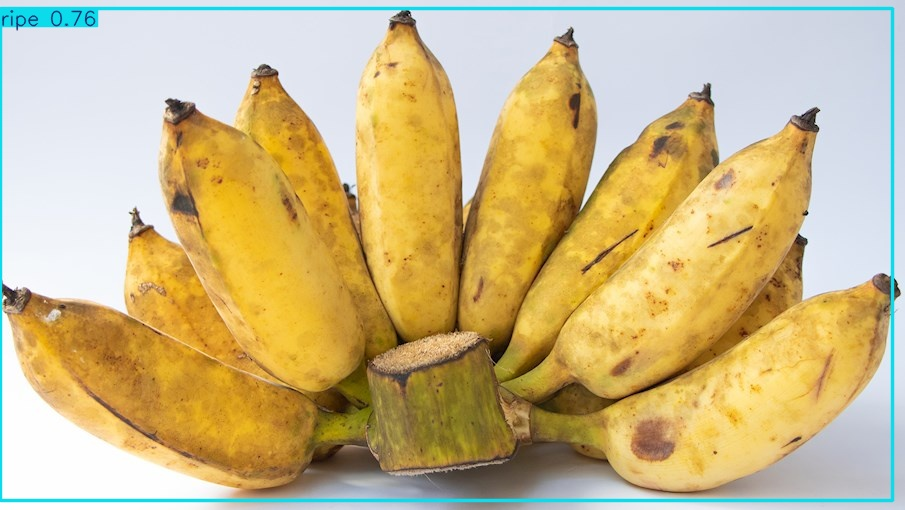

In [30]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict5/c5522058ca0e445e964eb0f5500a1372.jpg')

In [31]:
# Print the labels for a test image
with open('/content/runs/detect/predict5/labels/c5522058ca0e445e964eb0f5500a1372.txt', 'r') as f:
    print(f.read())

1 0.493145 0.499015 0.98629 0.964892 0.755345



In [32]:
# Predict with the model with an image
!yolo detect predict \
    model=/content/runs/detect/train4/weights/best.pt \
    source='/content/drive/MyDrive/ComputerVision/datasets/bananas/images/test/161582_1.jpg' \
    conf=0.05 \
    save=True save_txt=True save_conf=True

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/ComputerVision/datasets/bananas/images/test/161582_1.jpg: 384x640 1 ripe, 52.5ms
Speed: 3.5ms preprocess, 52.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict6
1 label saved to /content/runs/detect/predict6/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


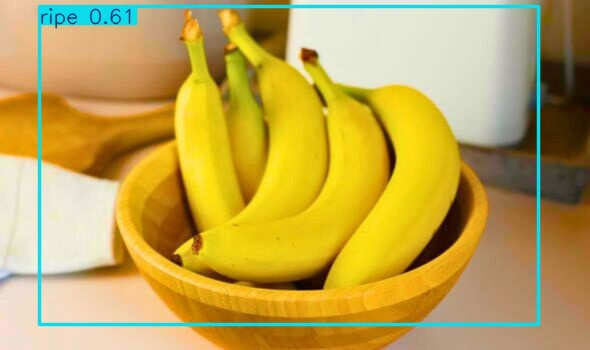

In [33]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict6/161582_1.jpg')

In [34]:
# Print the labels for a test image
with open('/content/runs/detect/predict6/labels/161582_1.txt', 'r') as f:
    print(f.read())

1 0.489928 0.47233 0.845085 0.90851 0.610001



# 4. Performance

Accuracy

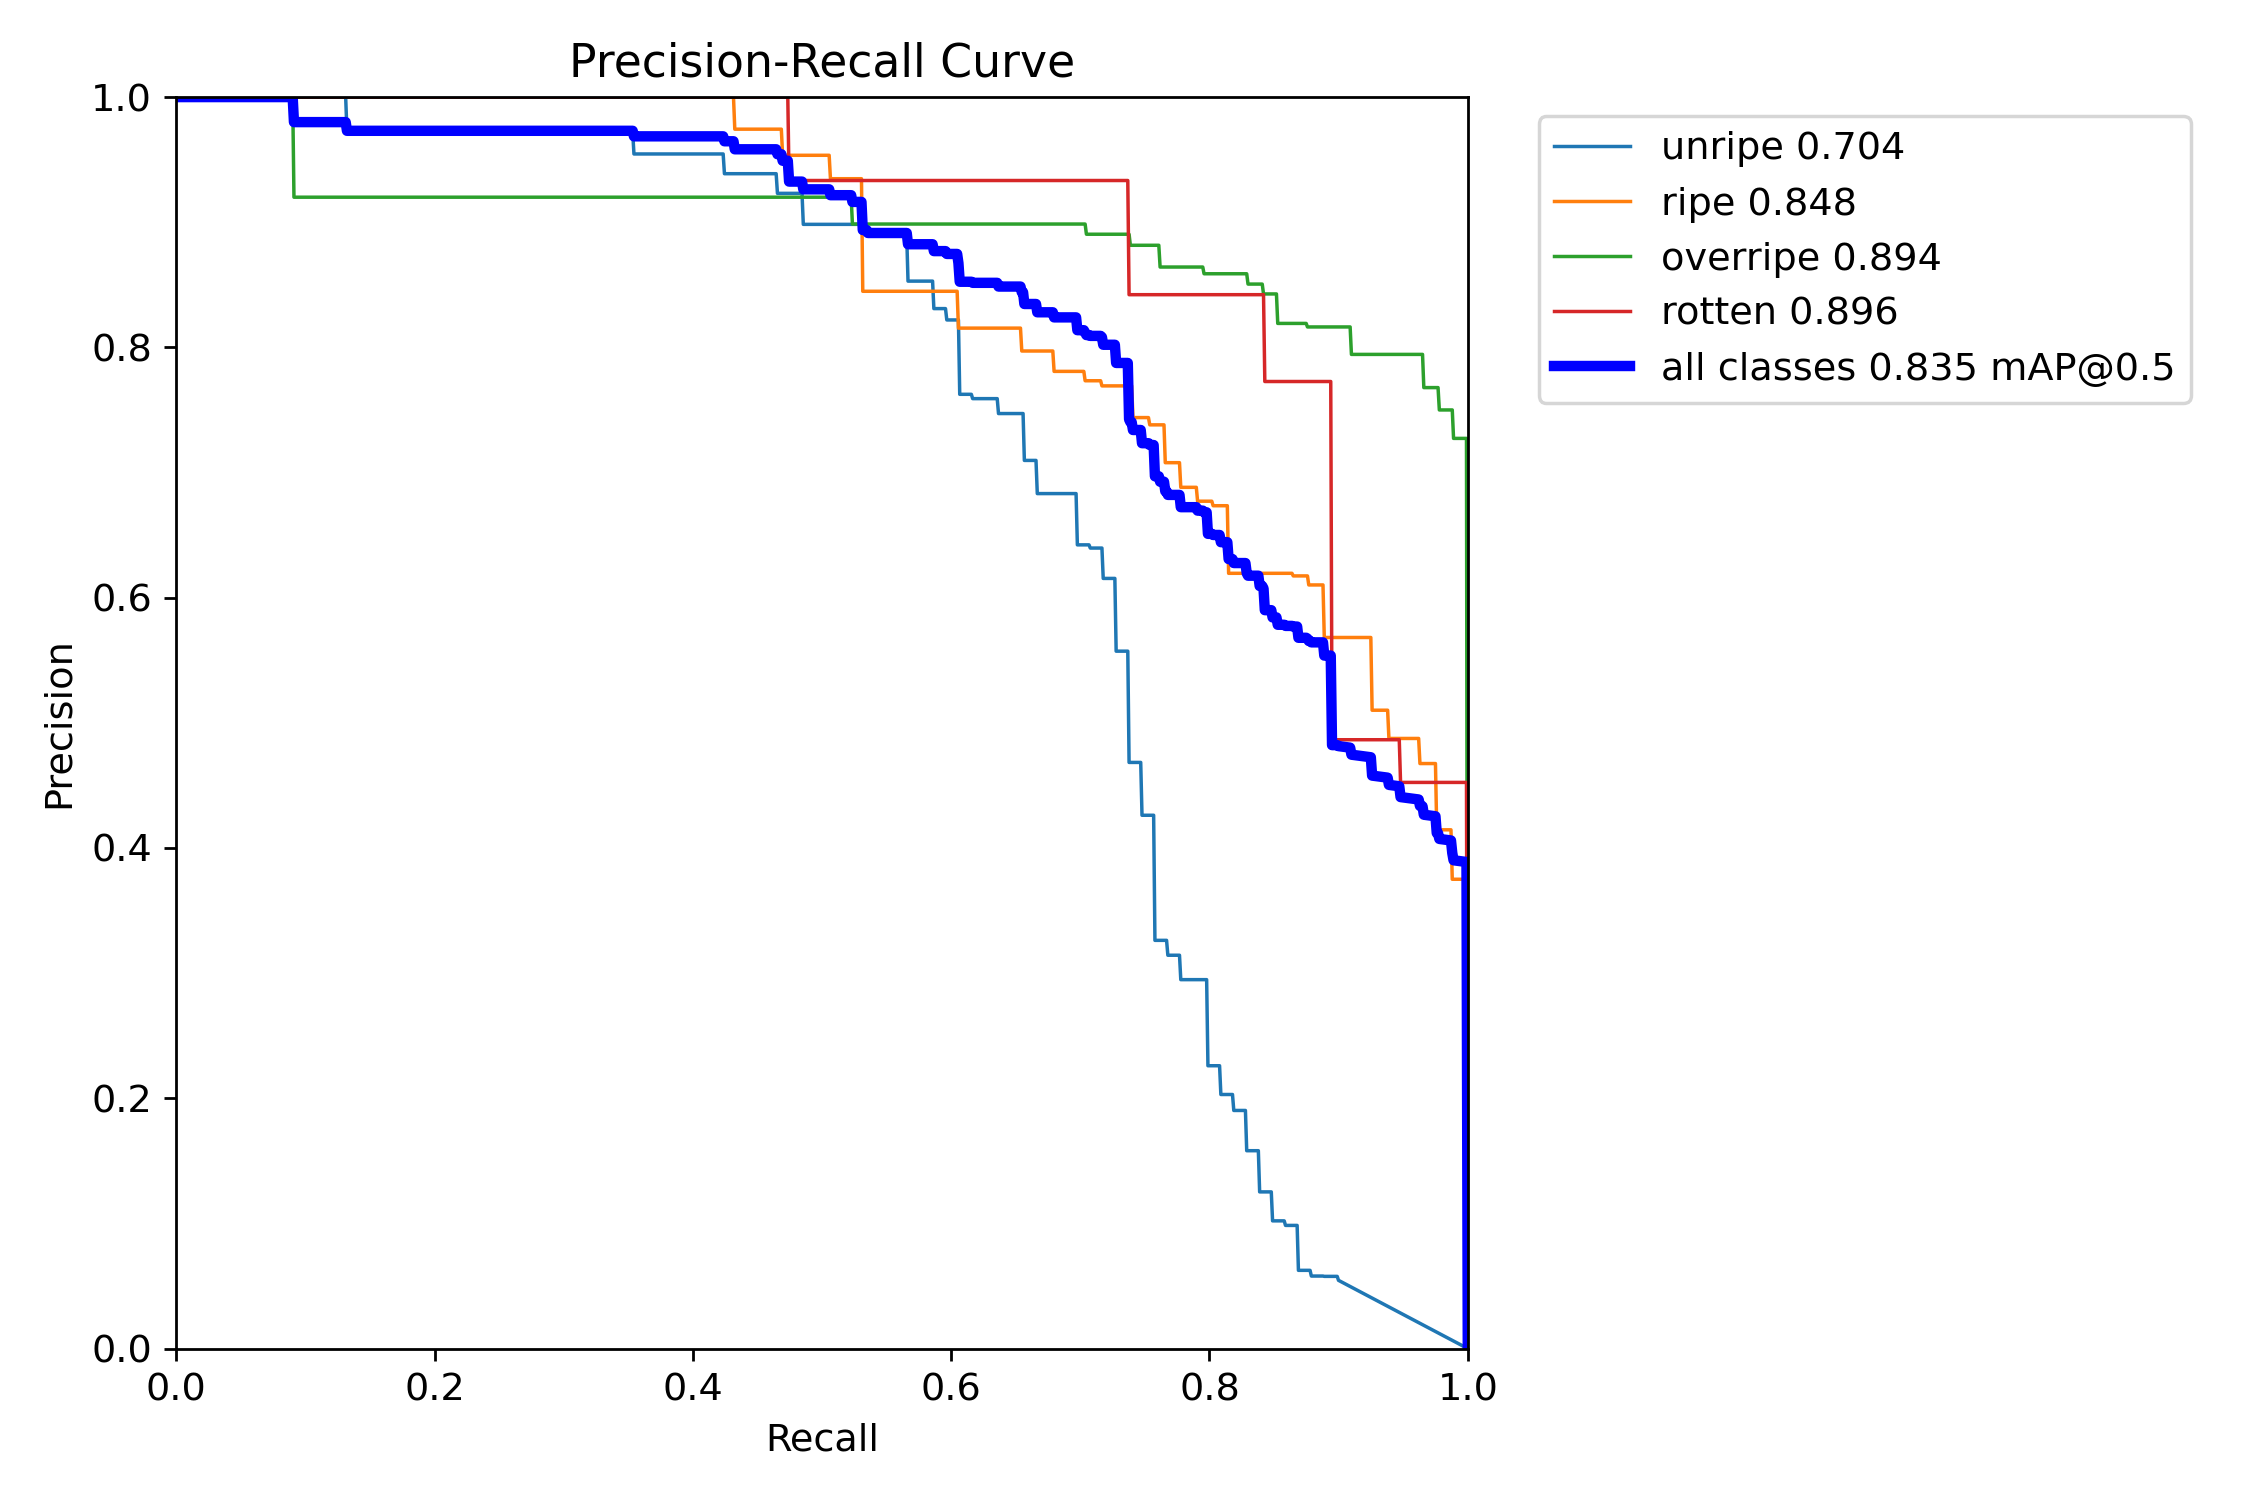

In [35]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train4/BoxPR_curve.png')

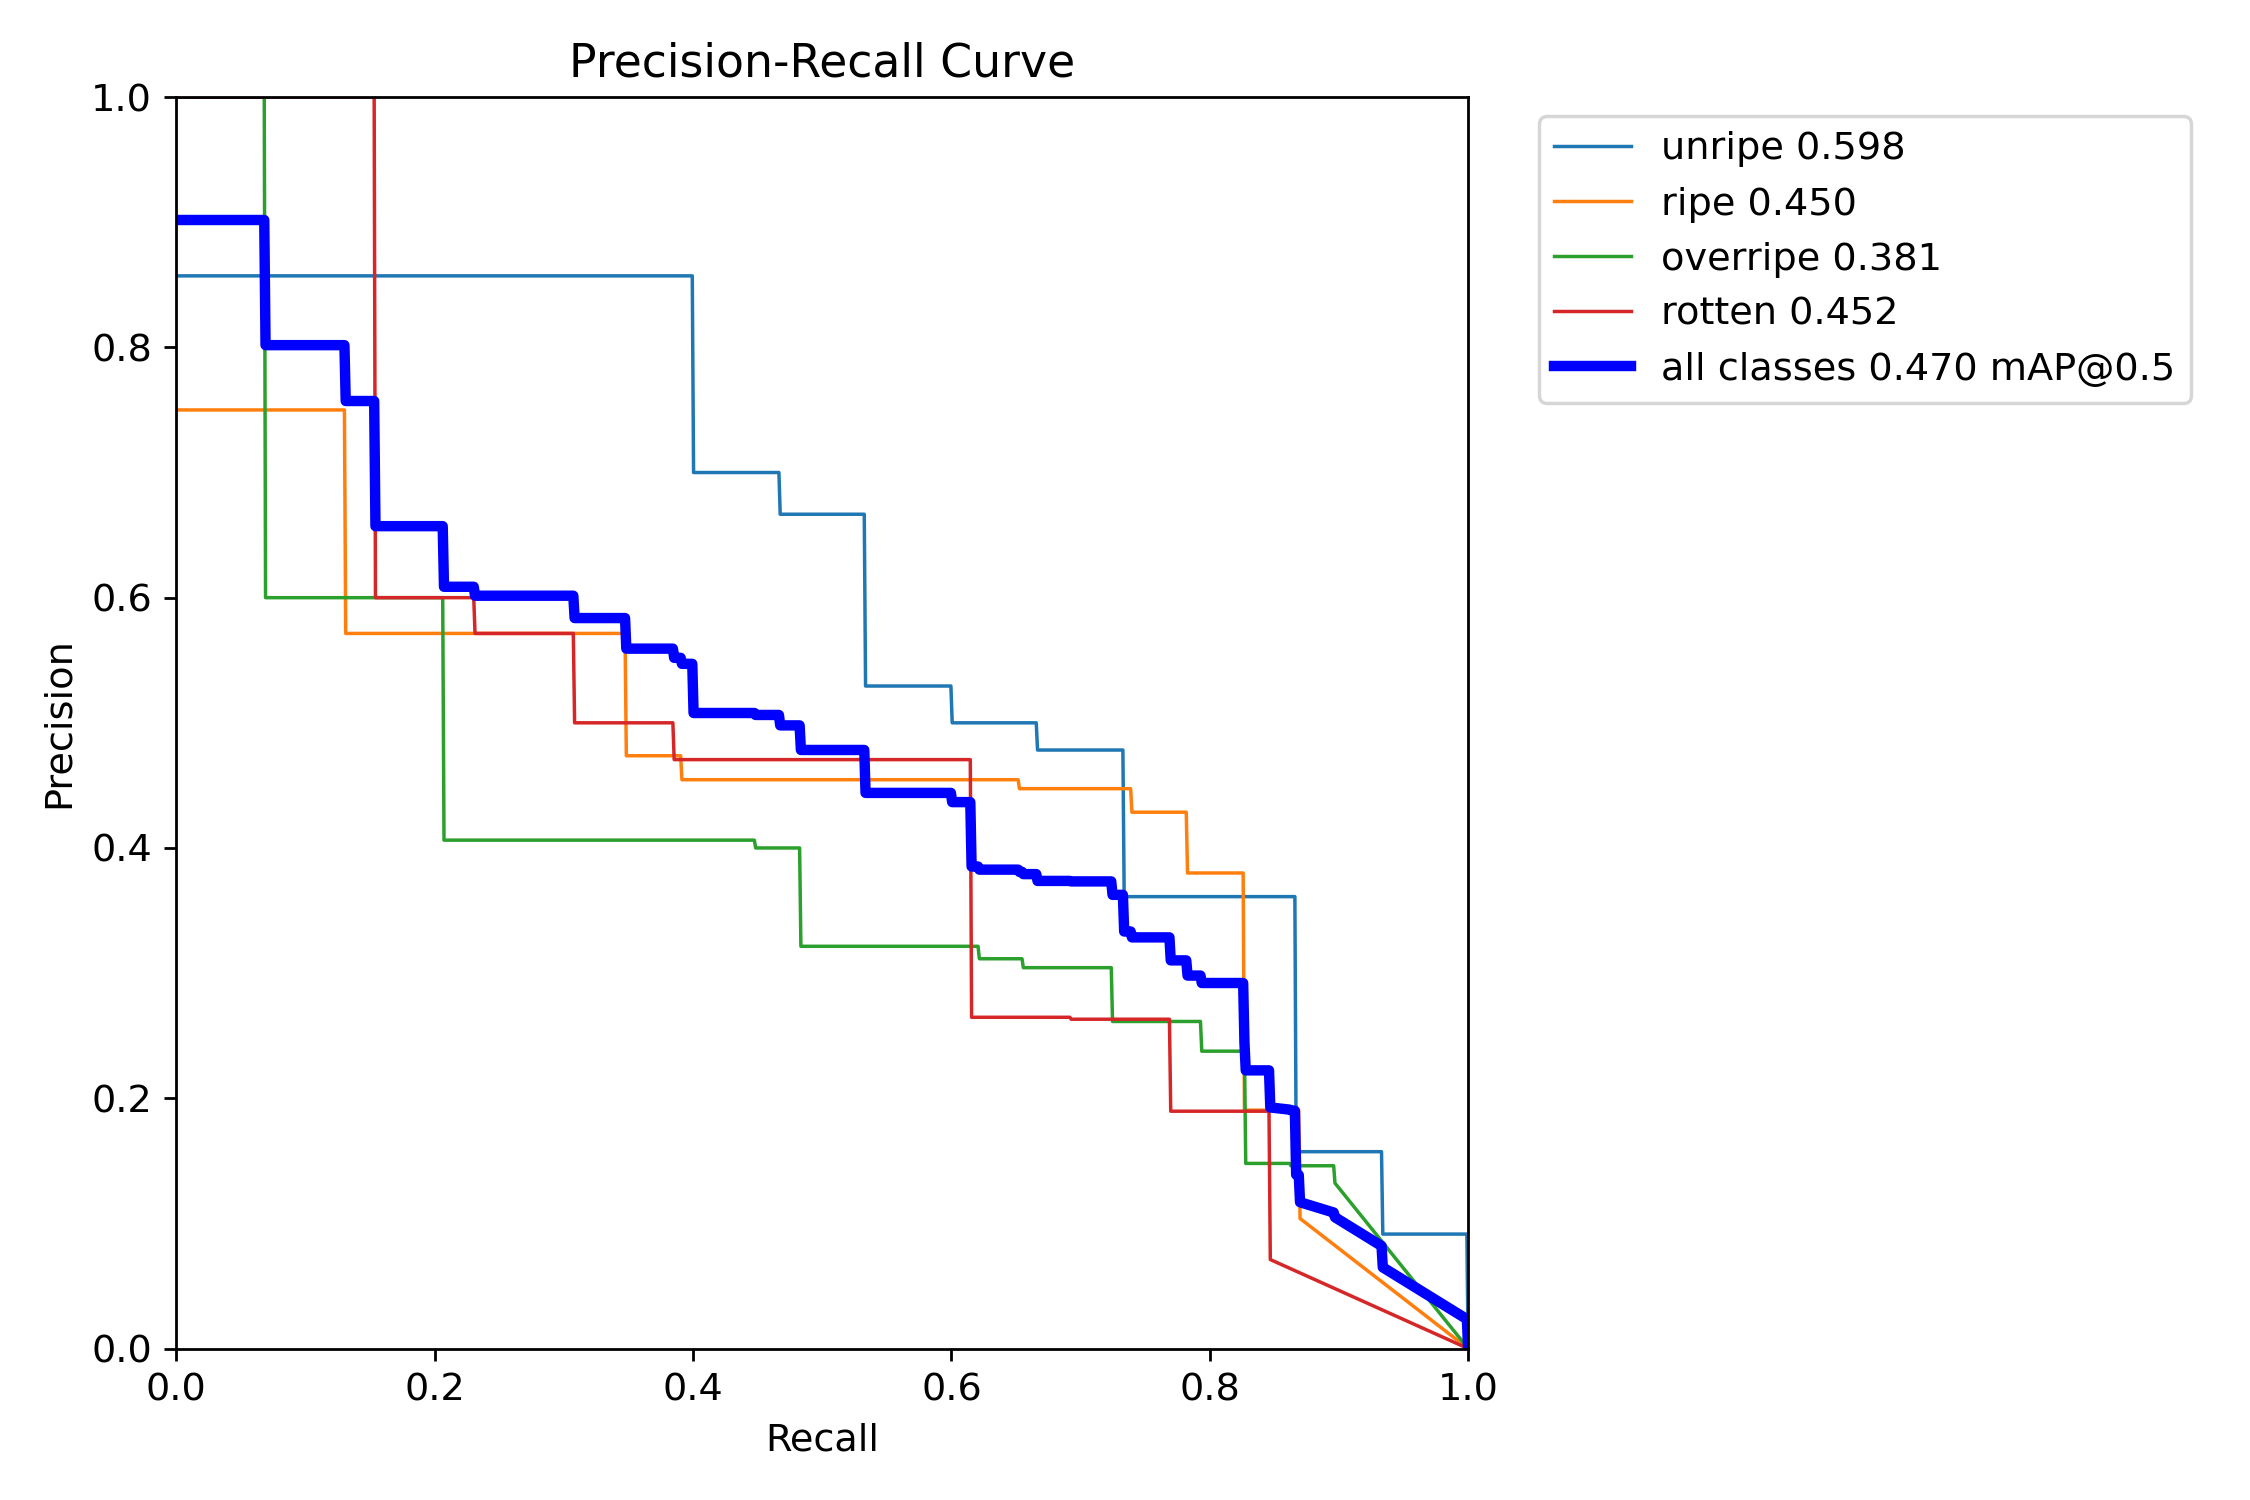

In [36]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/test3/BoxPR_curve.png')

Precision

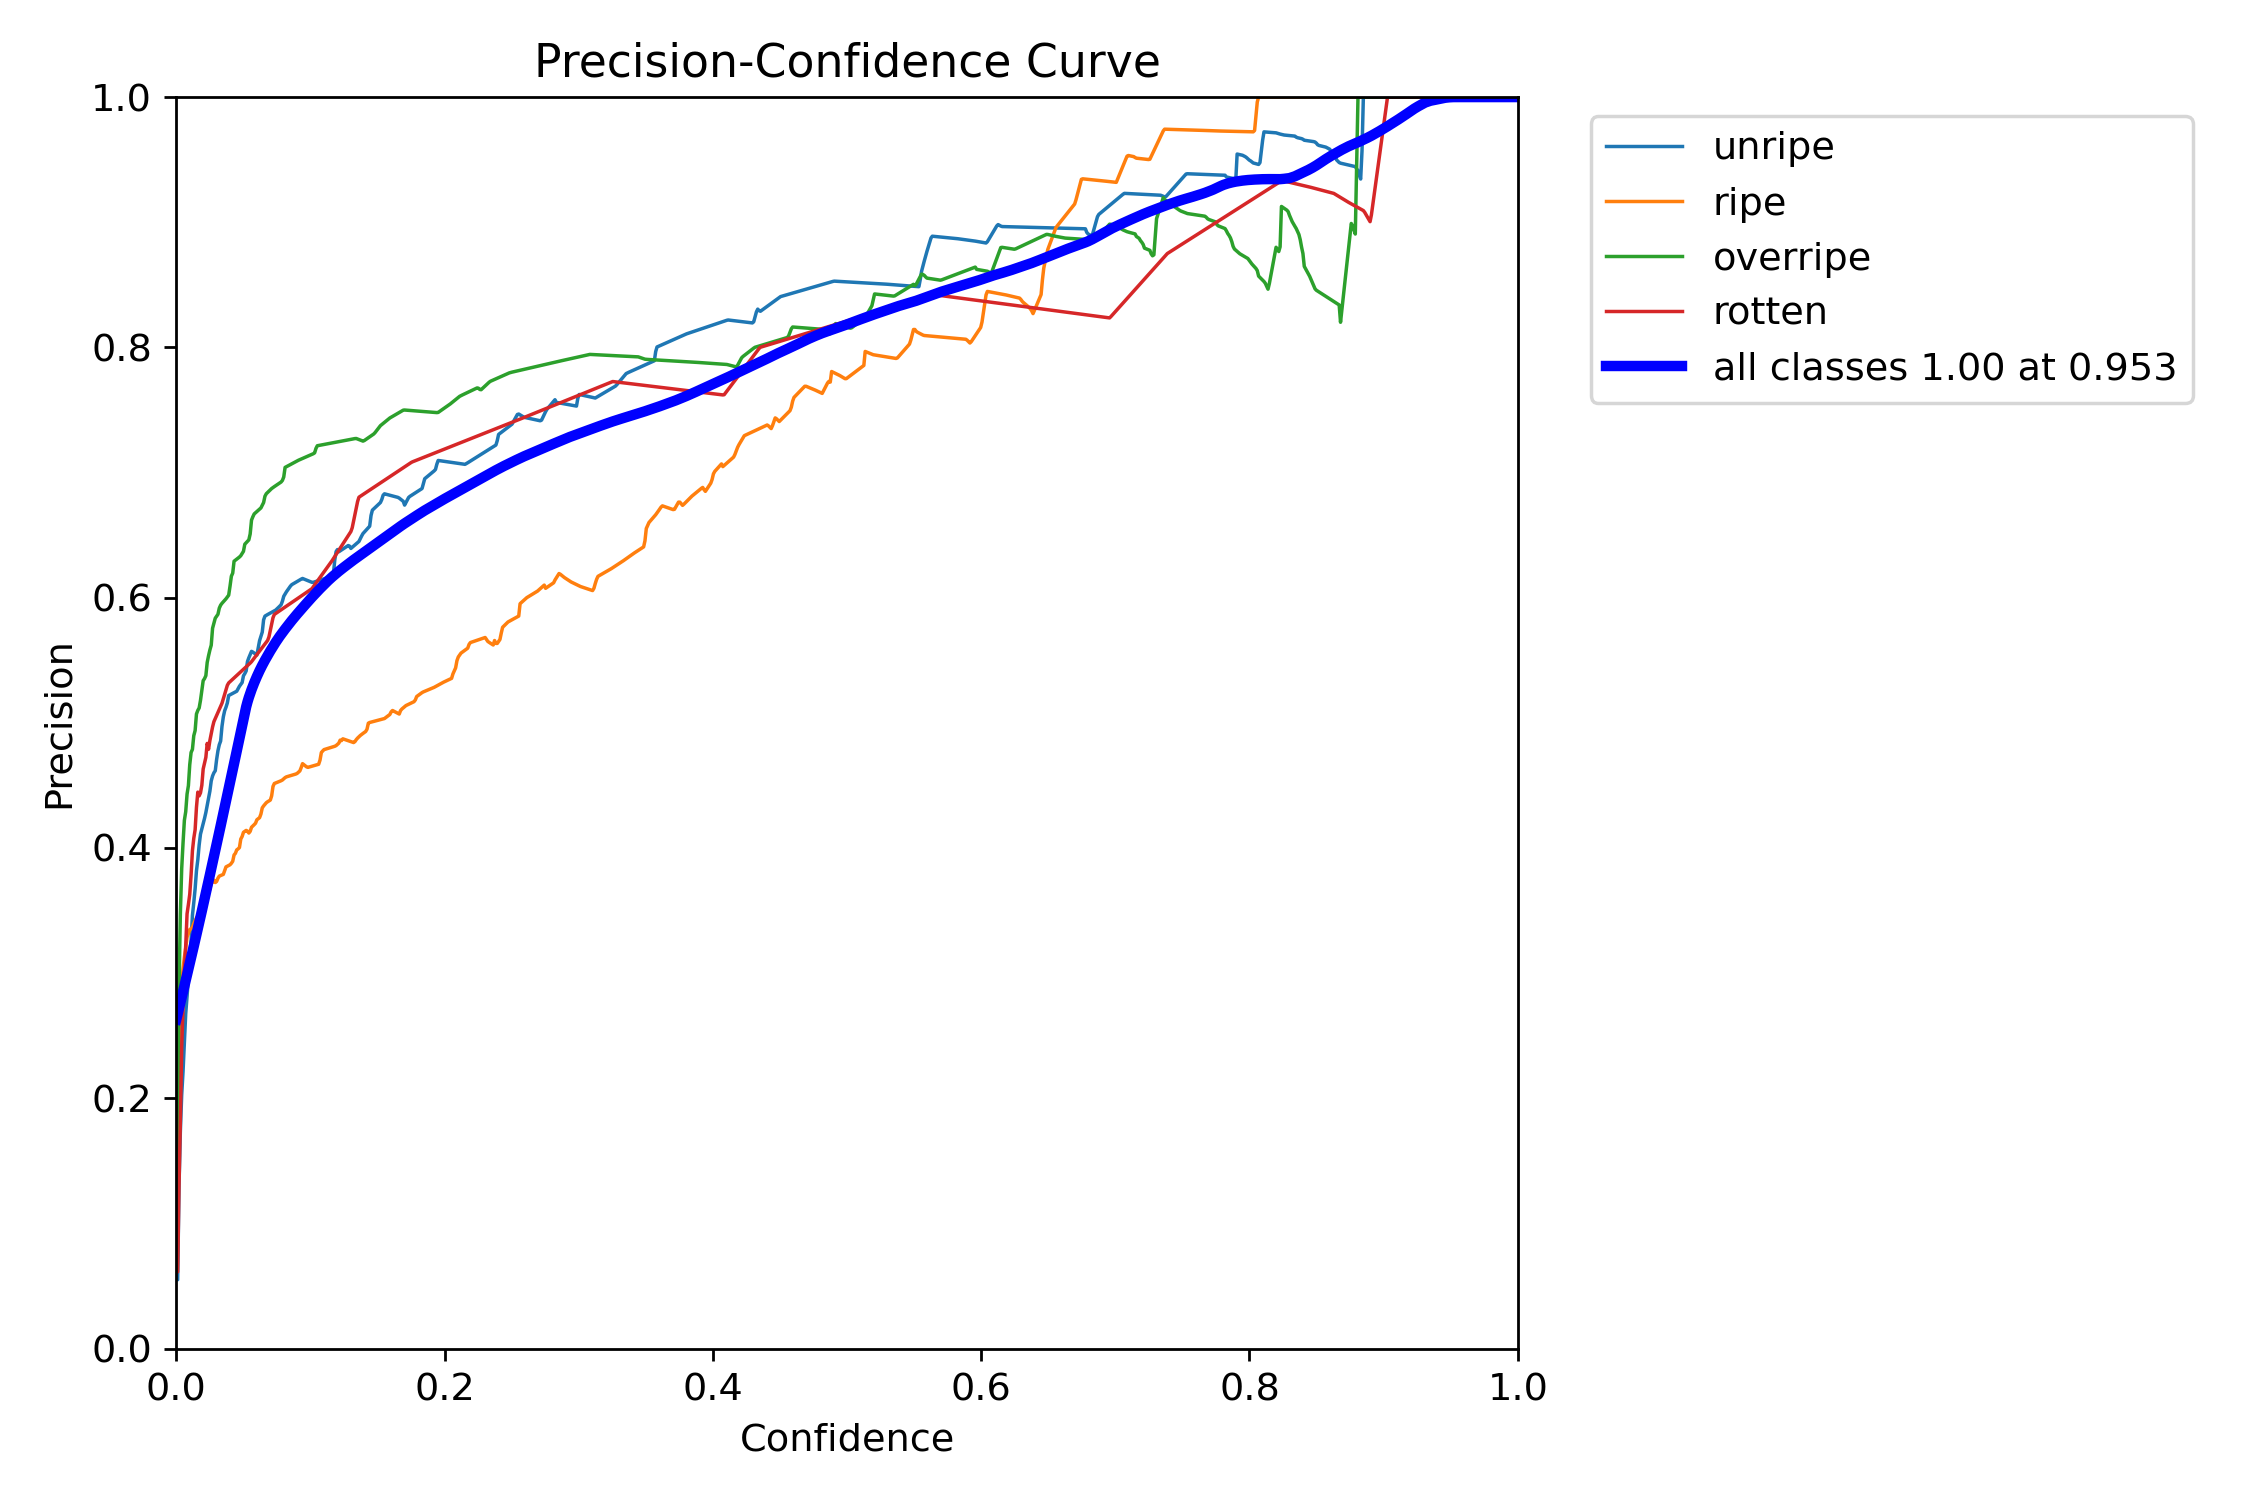

In [37]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train4/BoxP_curve.png')

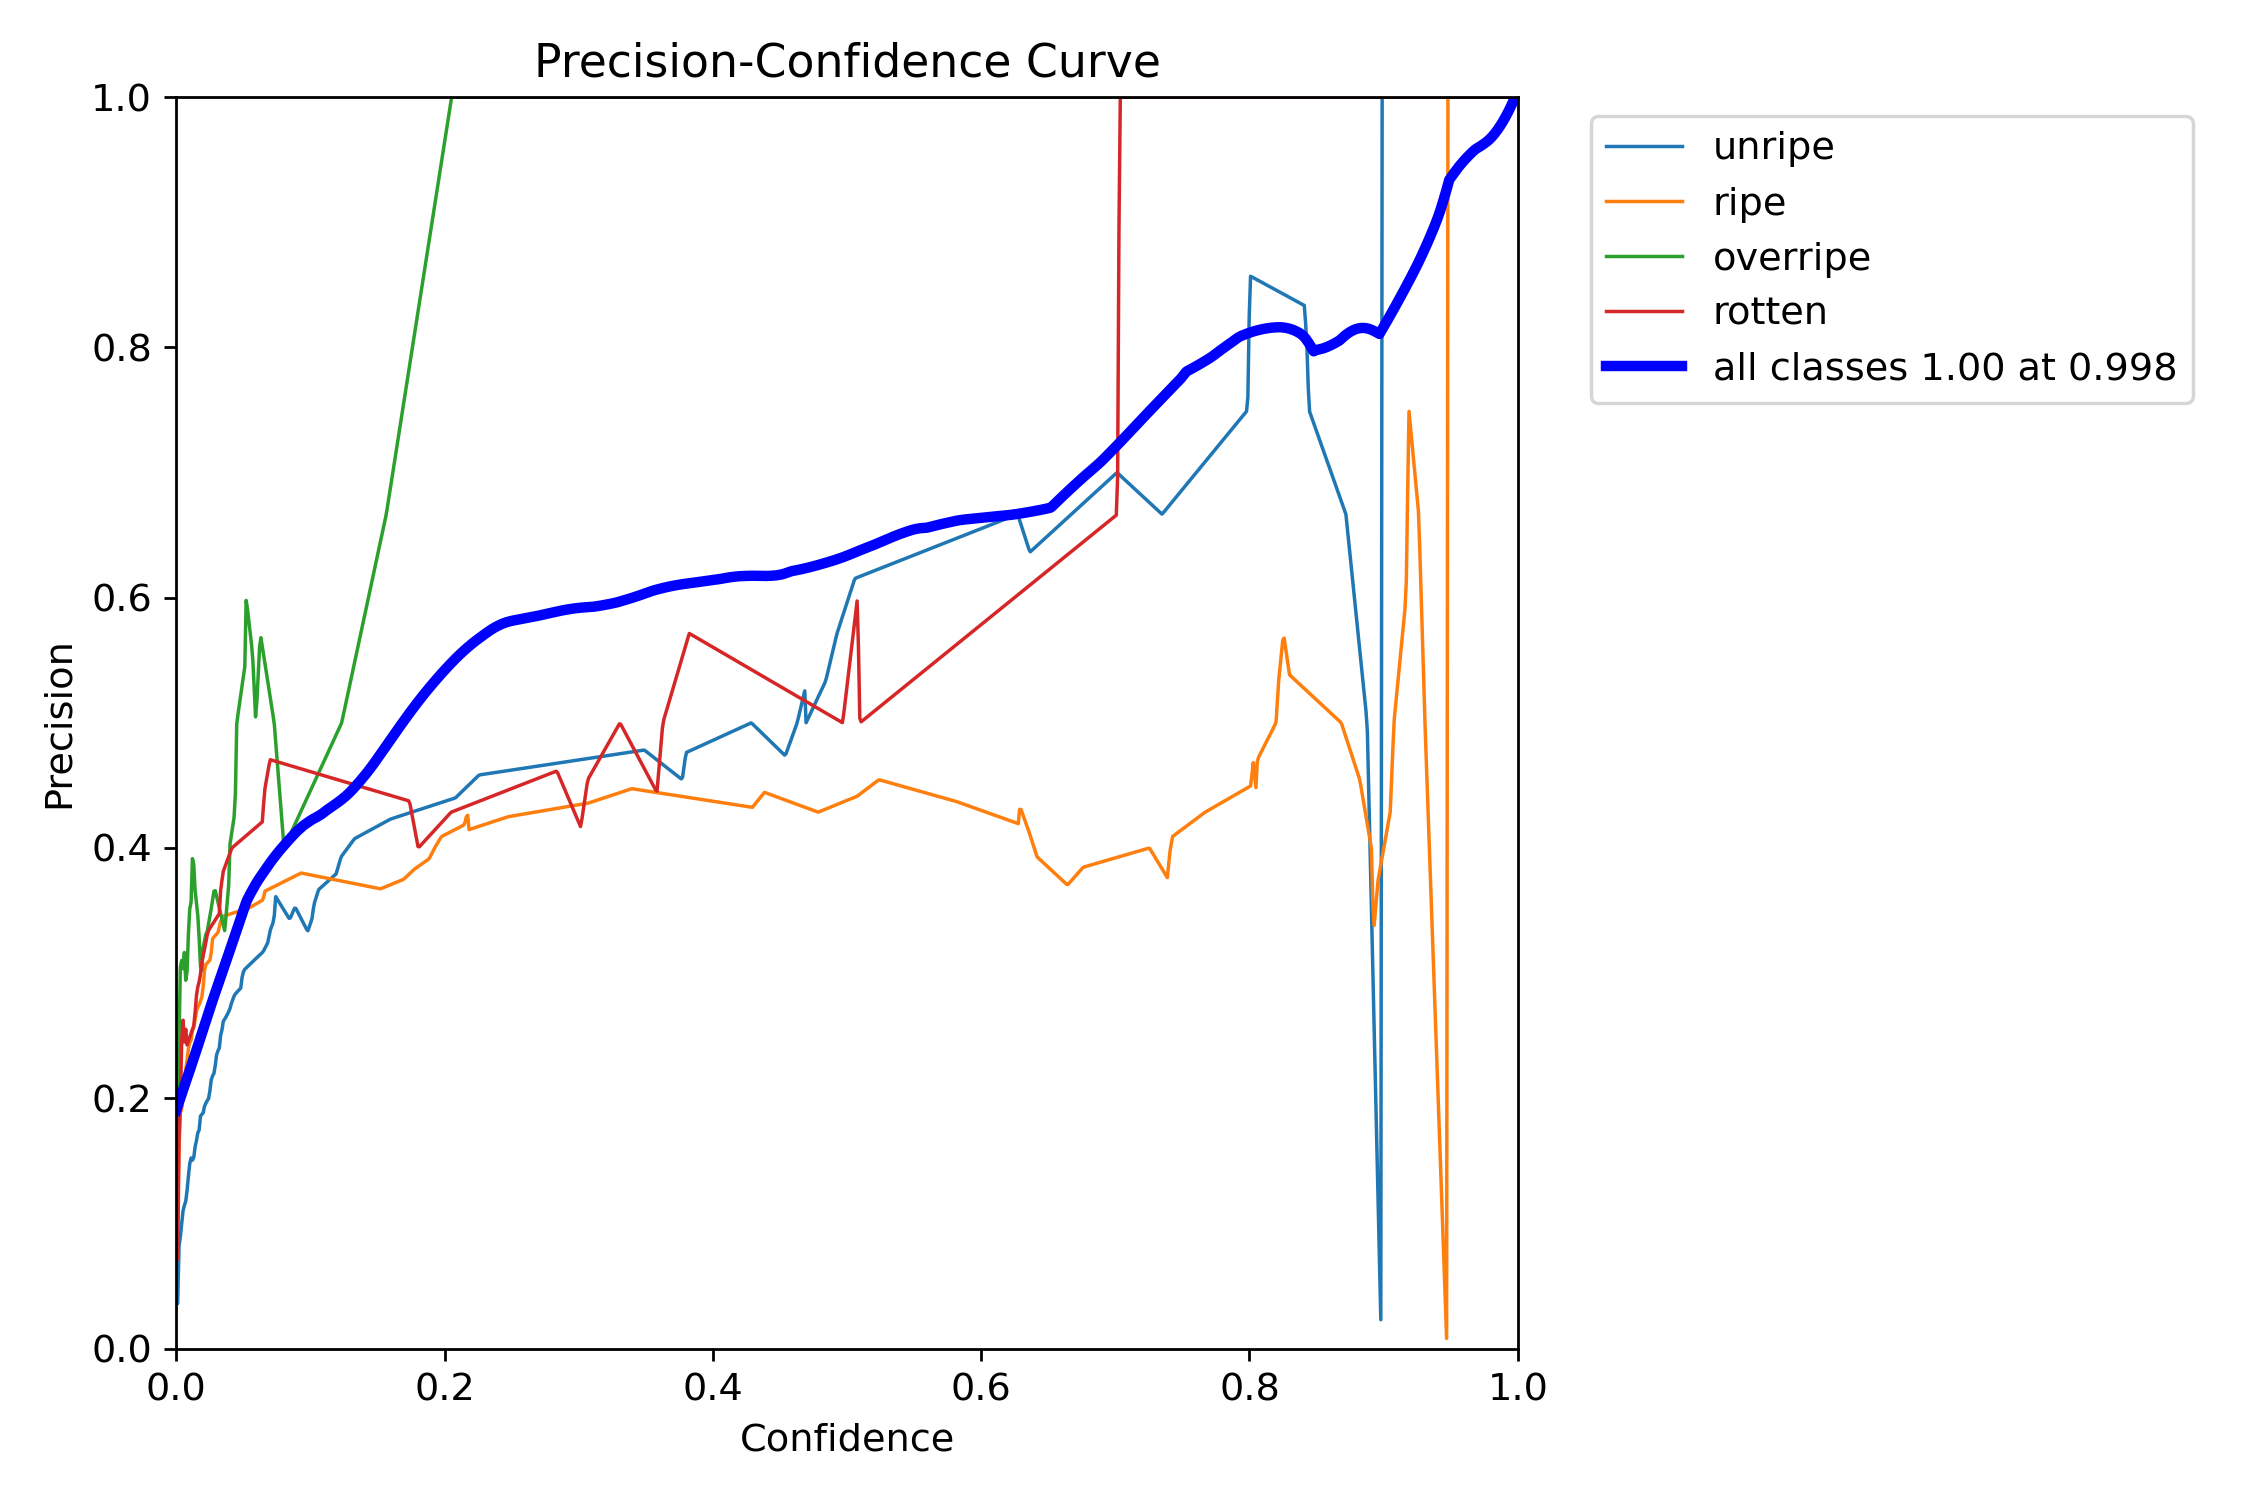

In [38]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/test3/BoxP_curve.png')

Recall

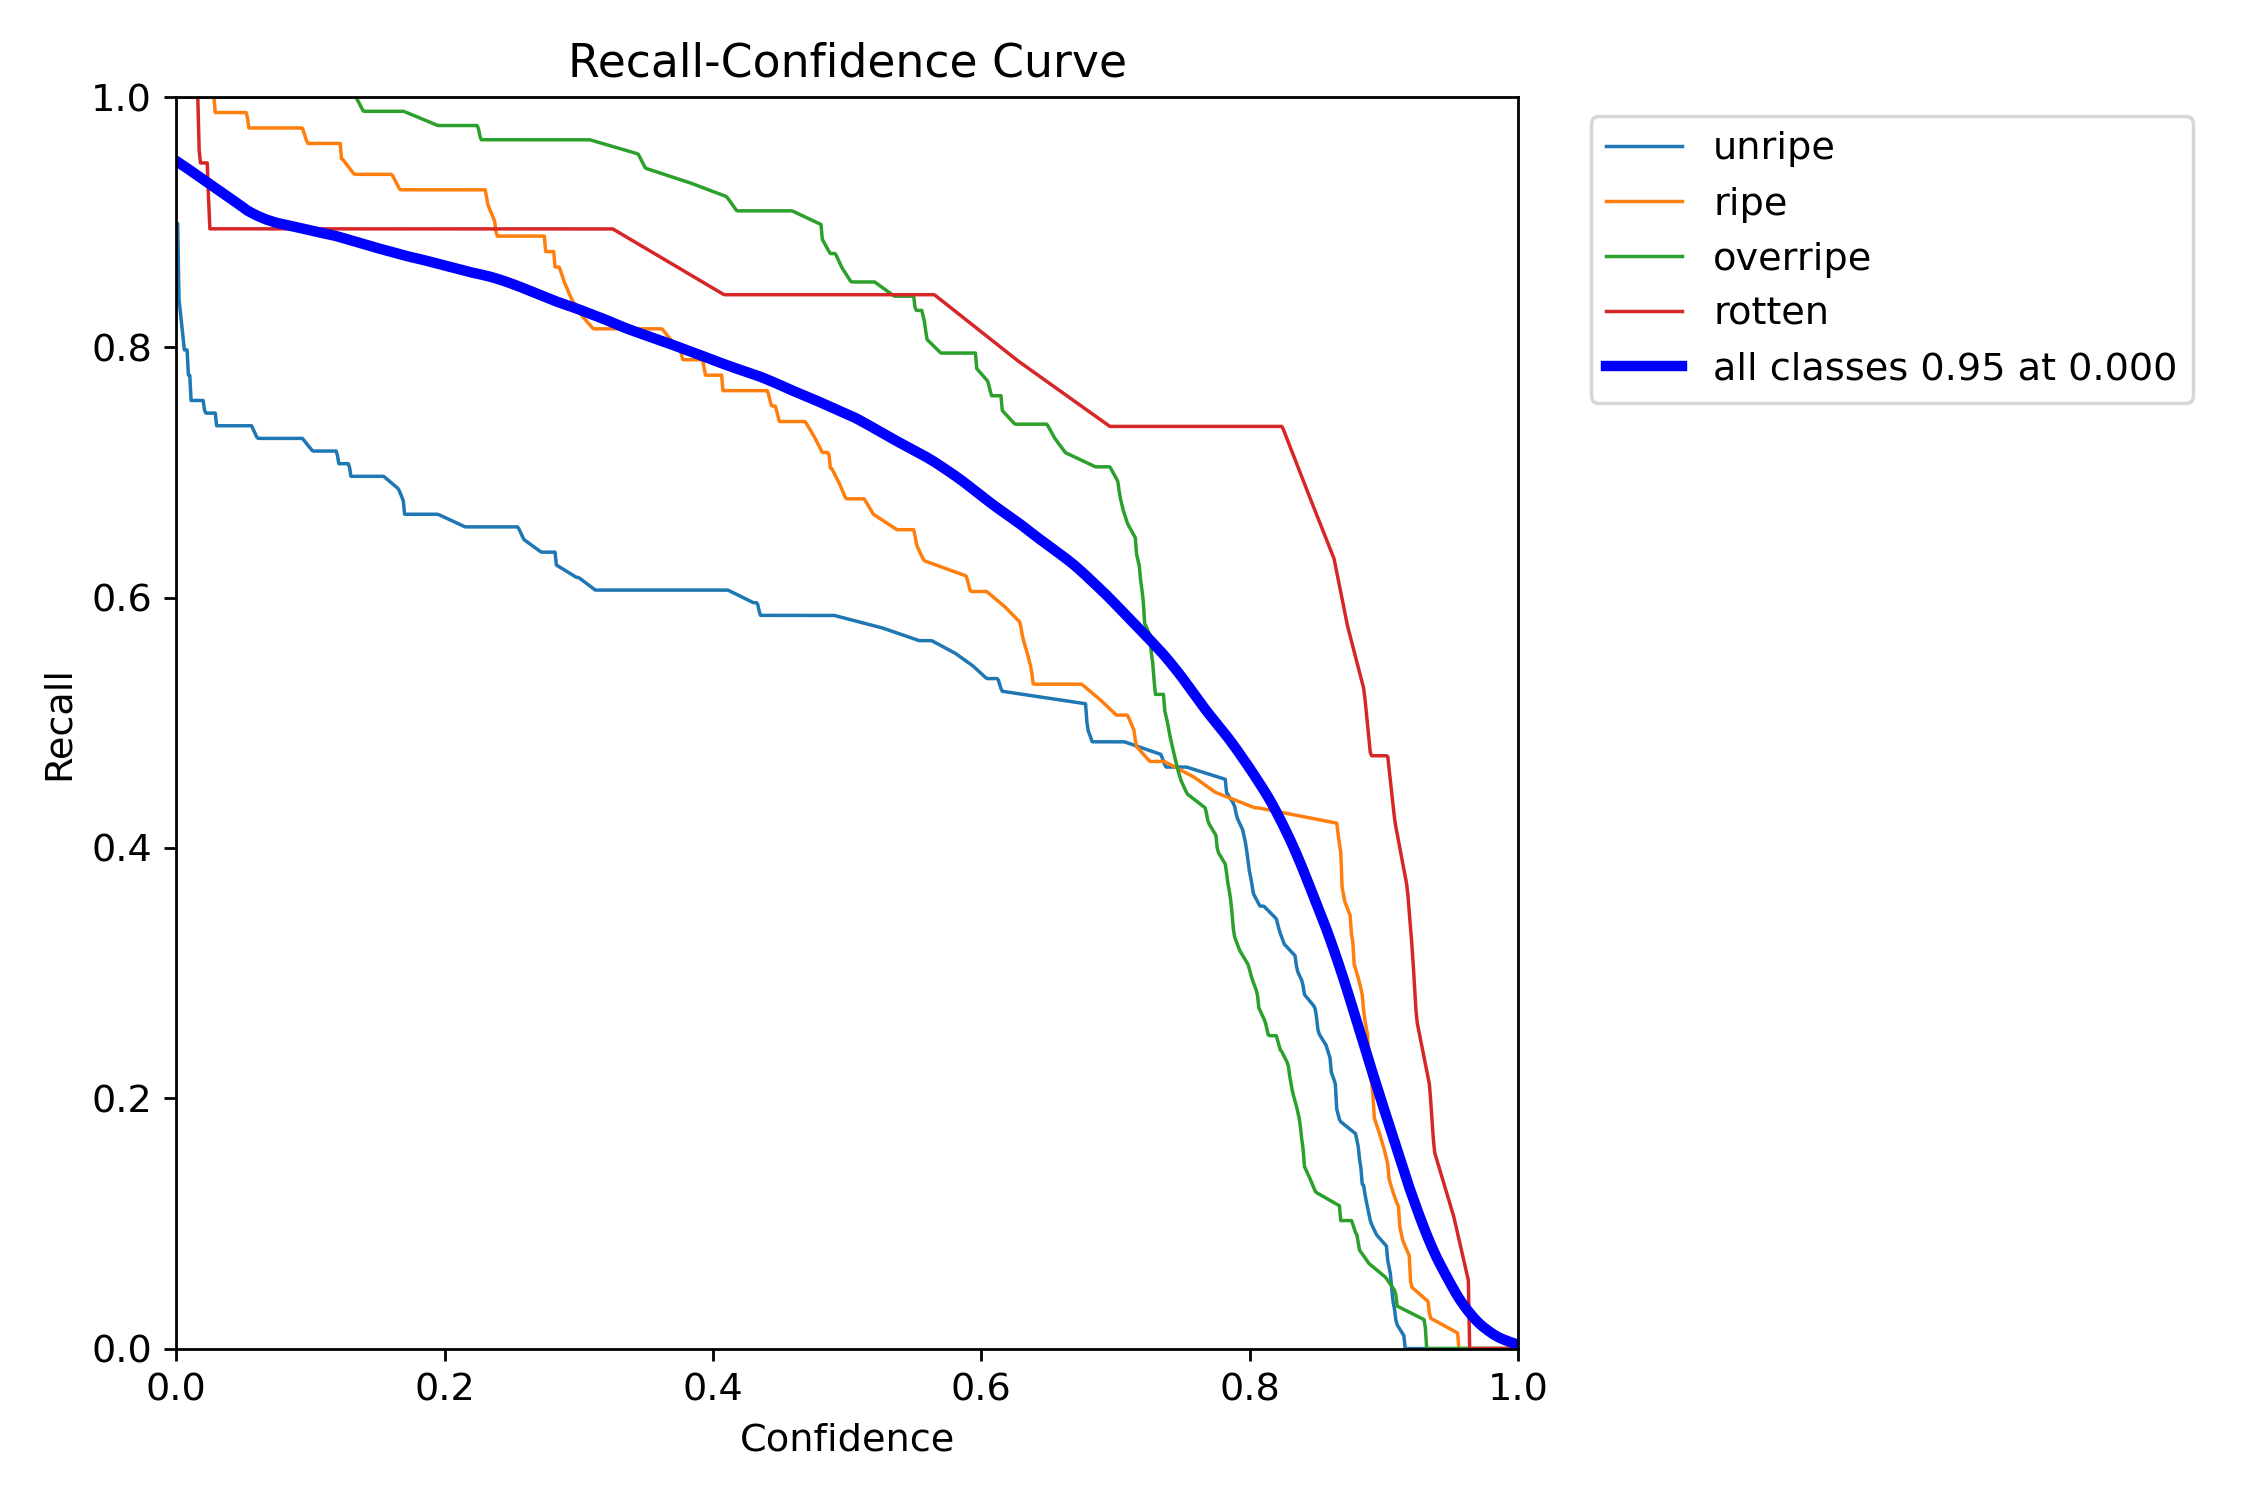

In [39]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train4/BoxR_curve.png')

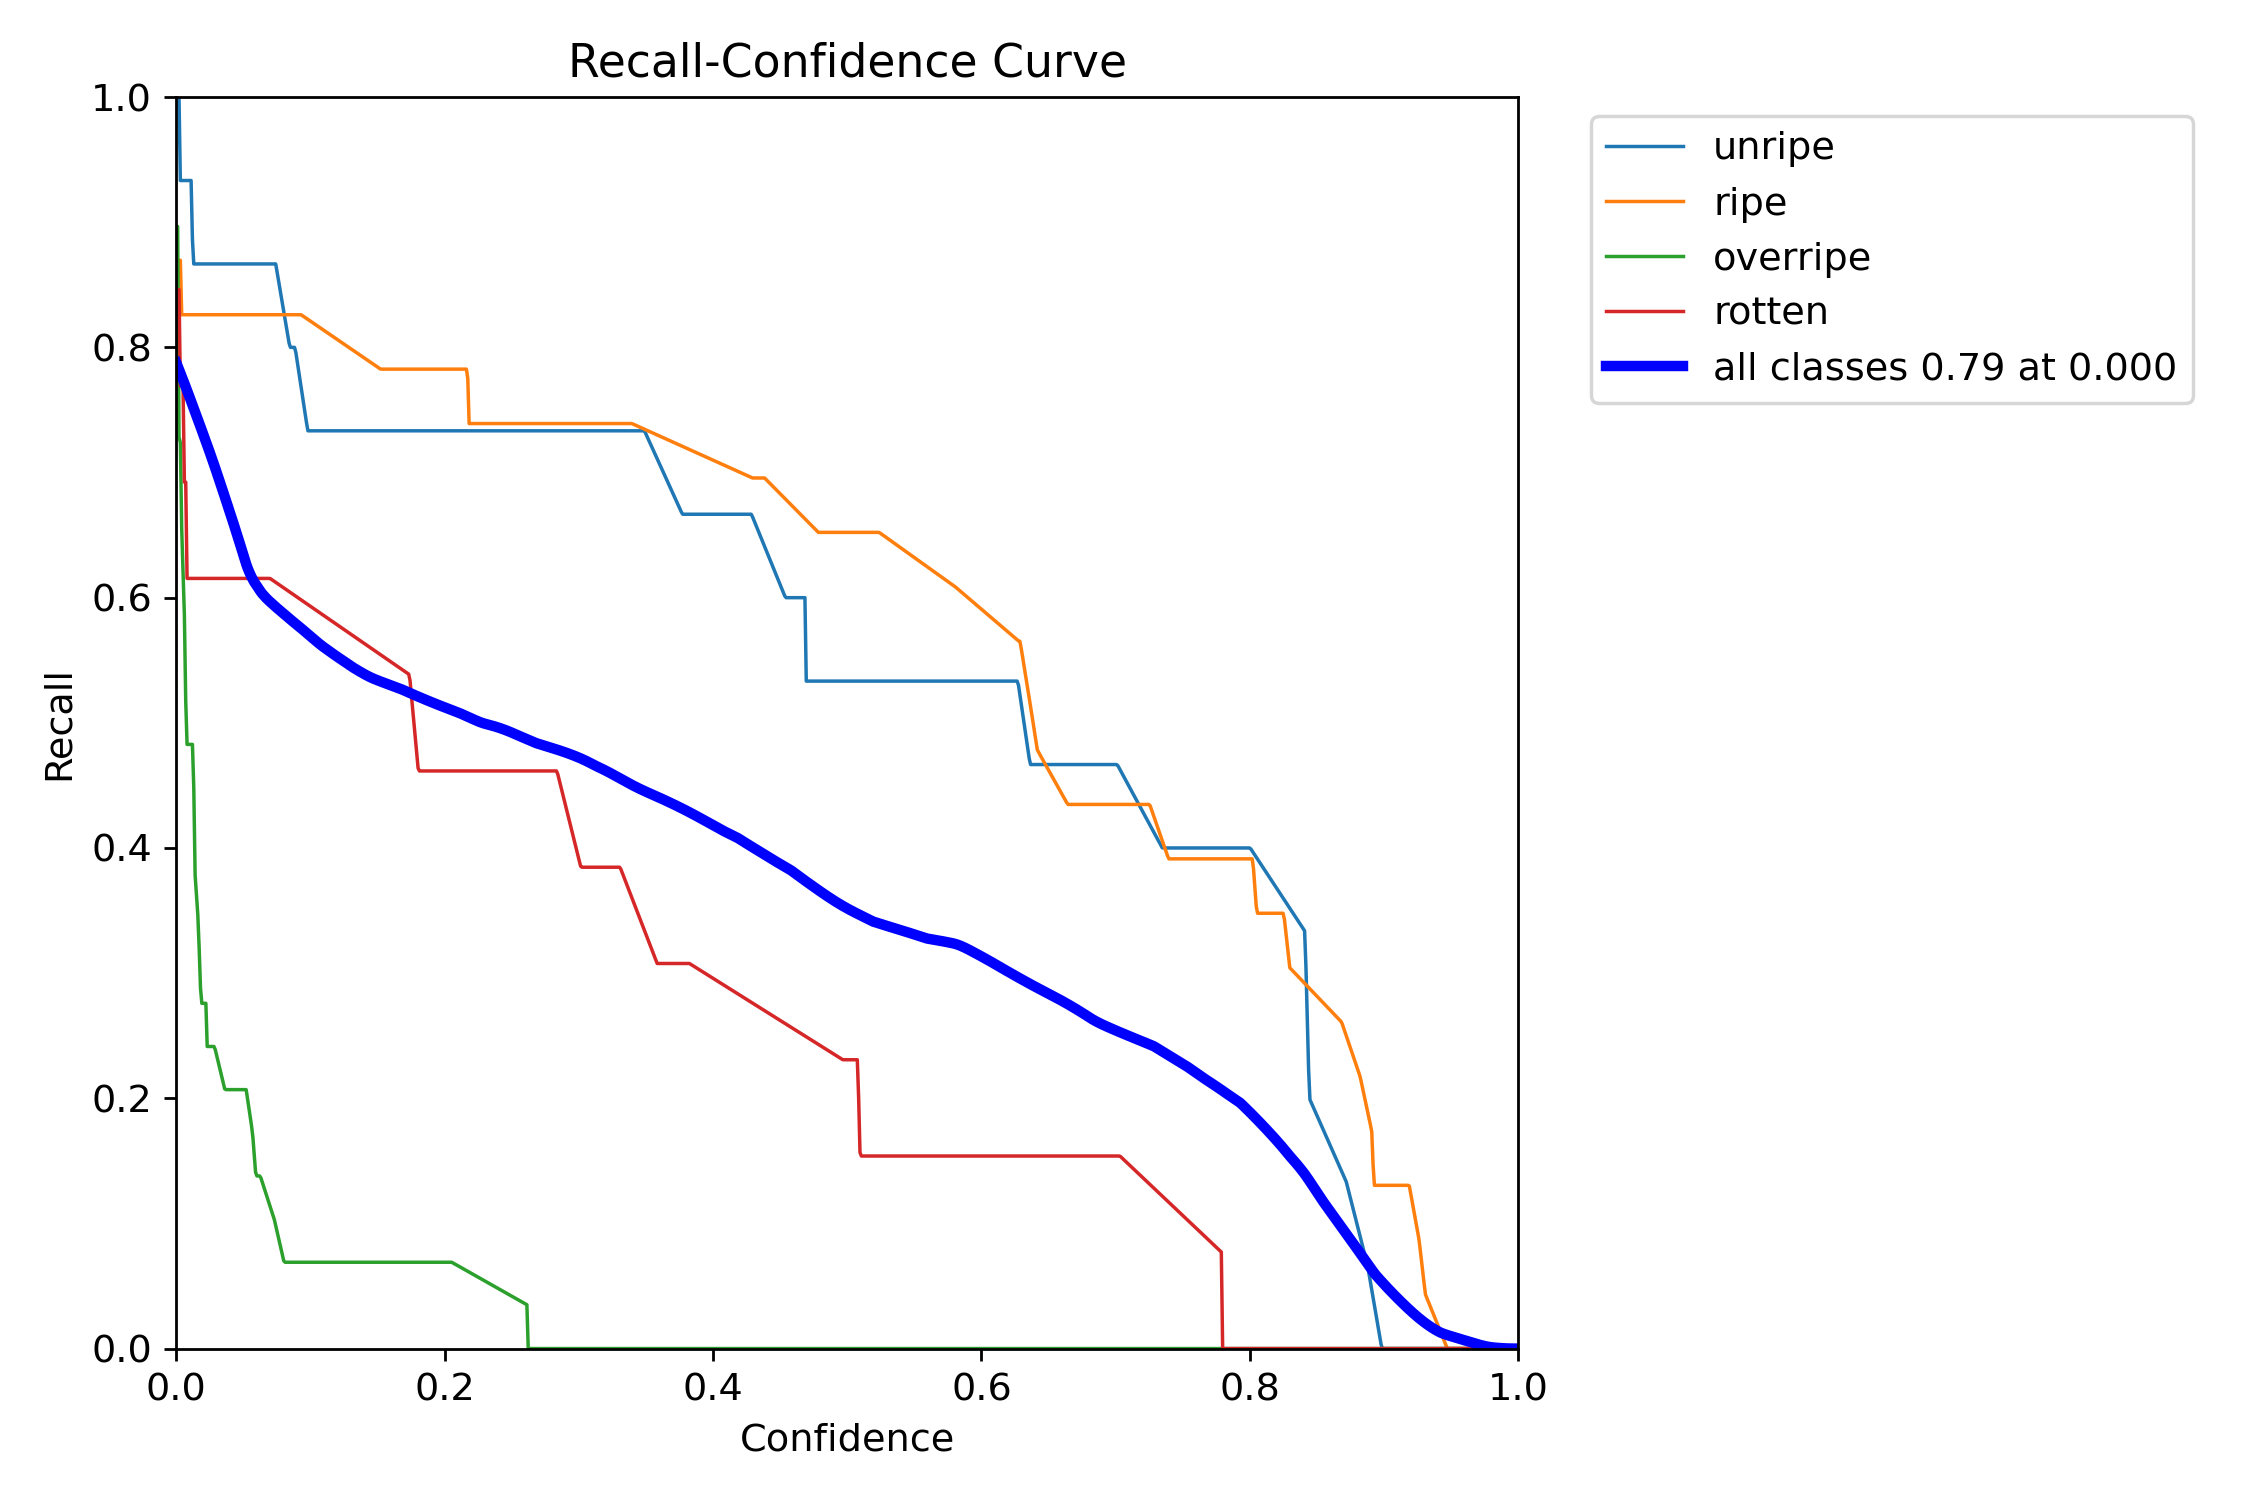

In [40]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/test3/BoxR_curve.png')

F1 Score

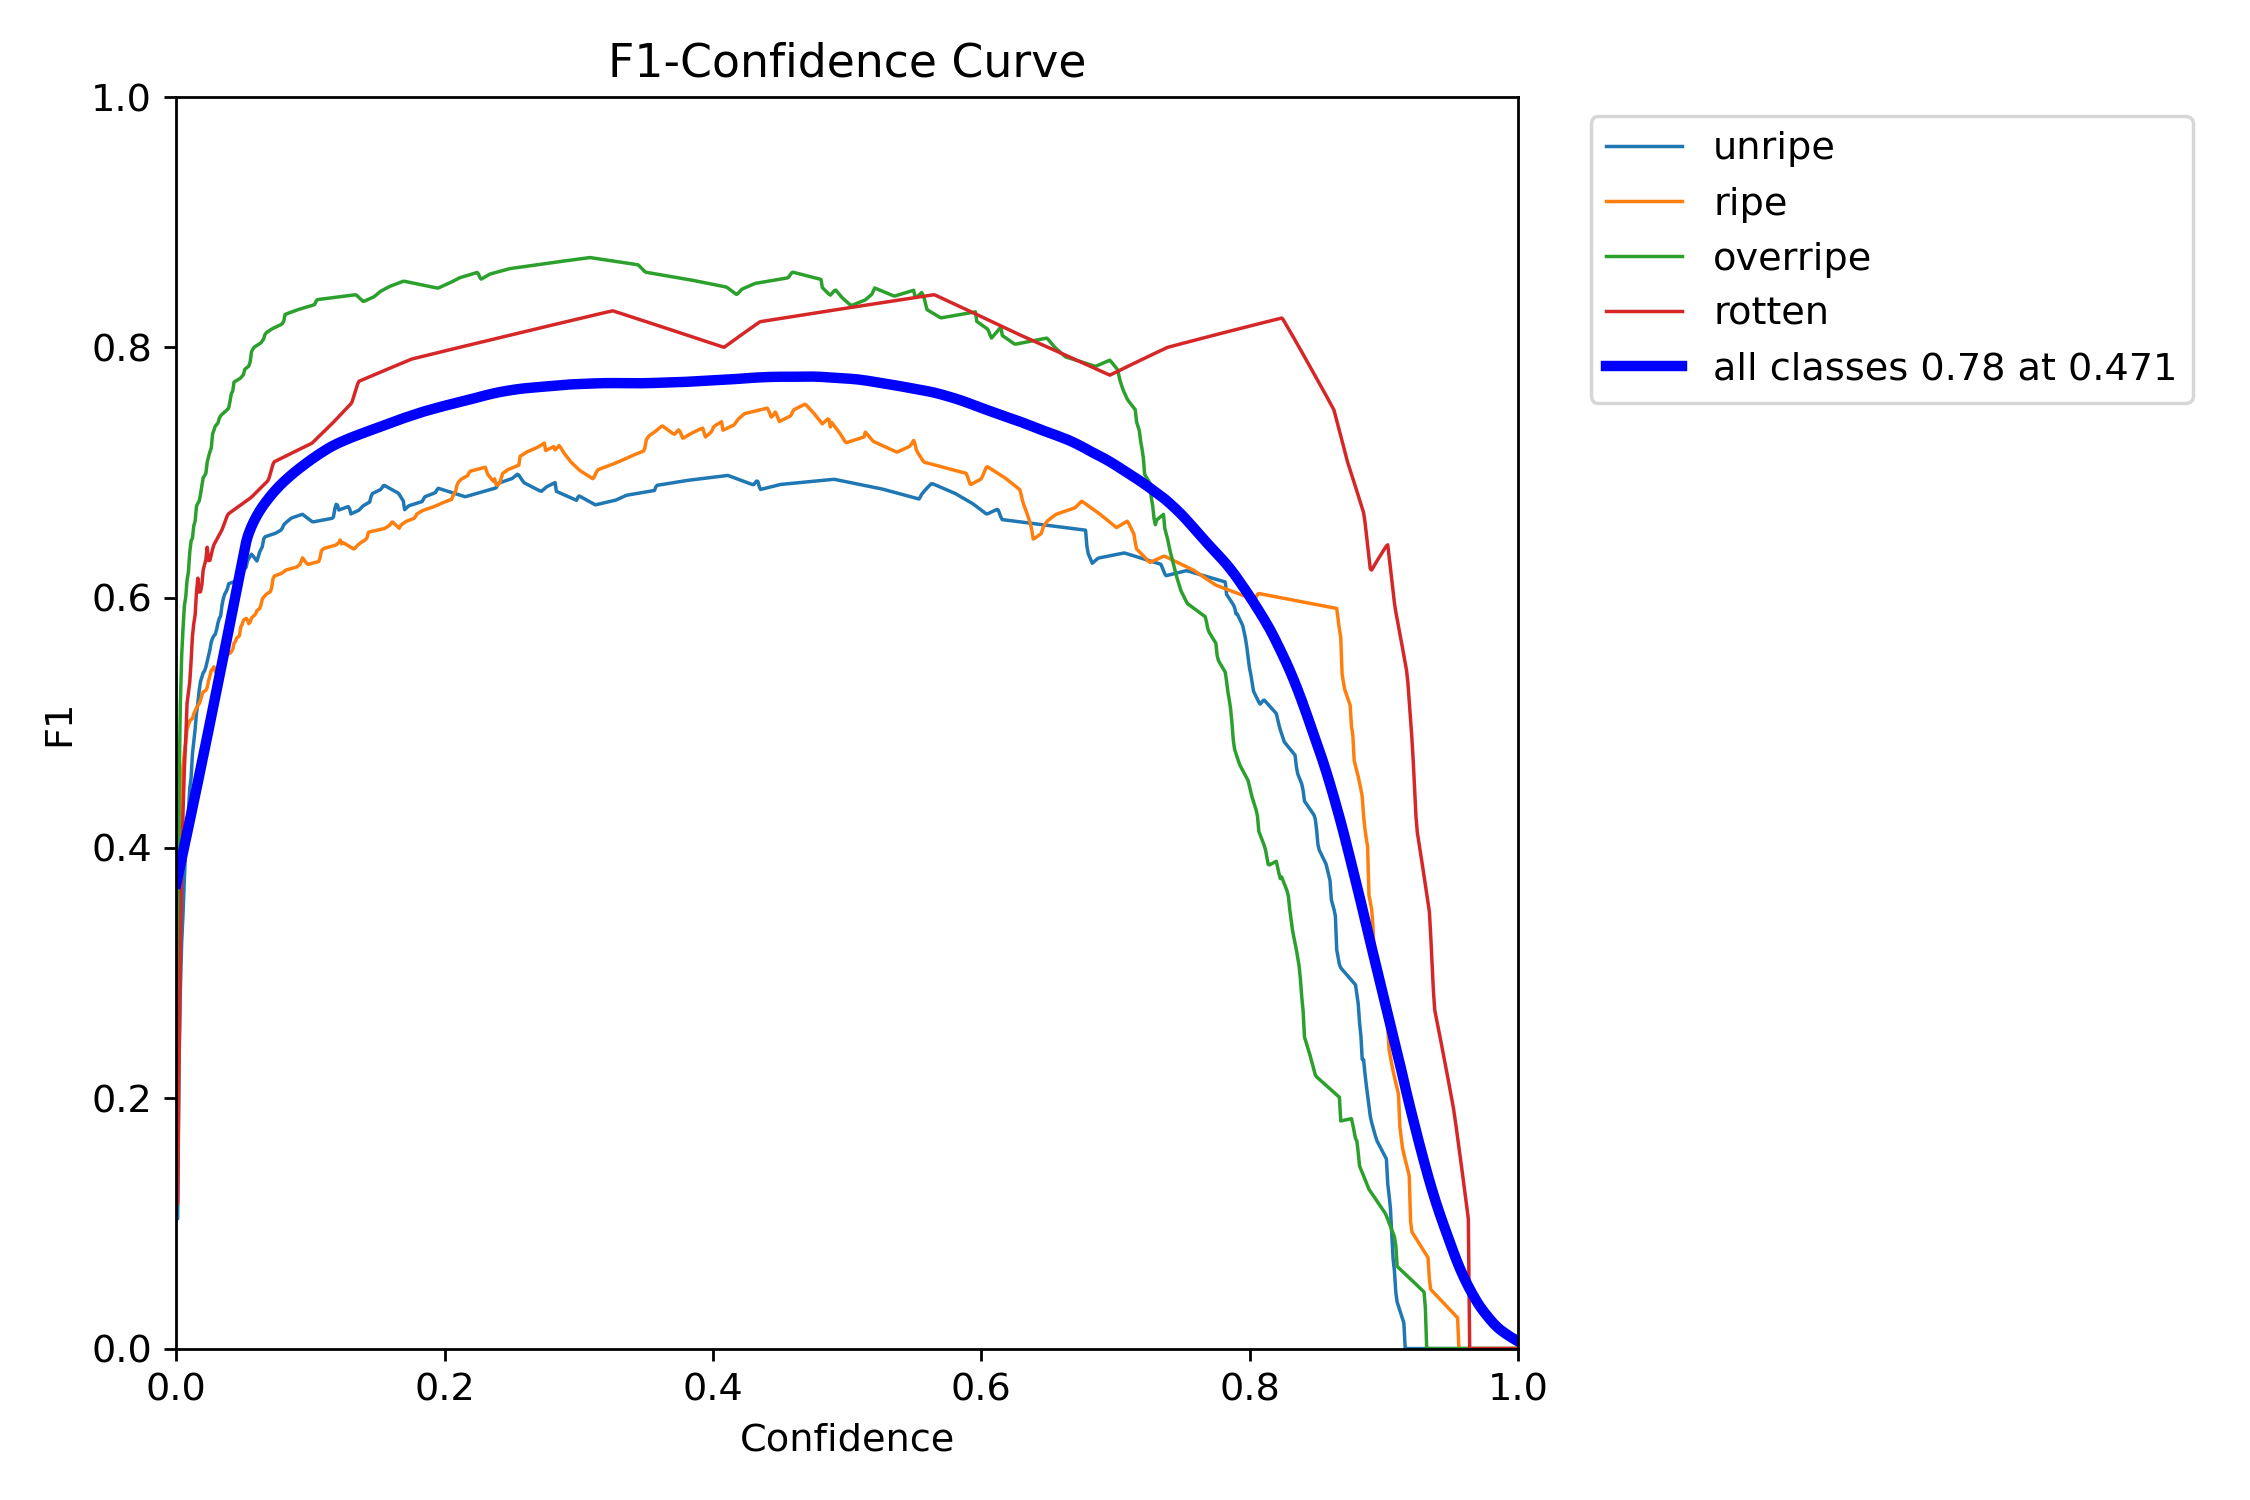

In [41]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train4/BoxF1_curve.png')

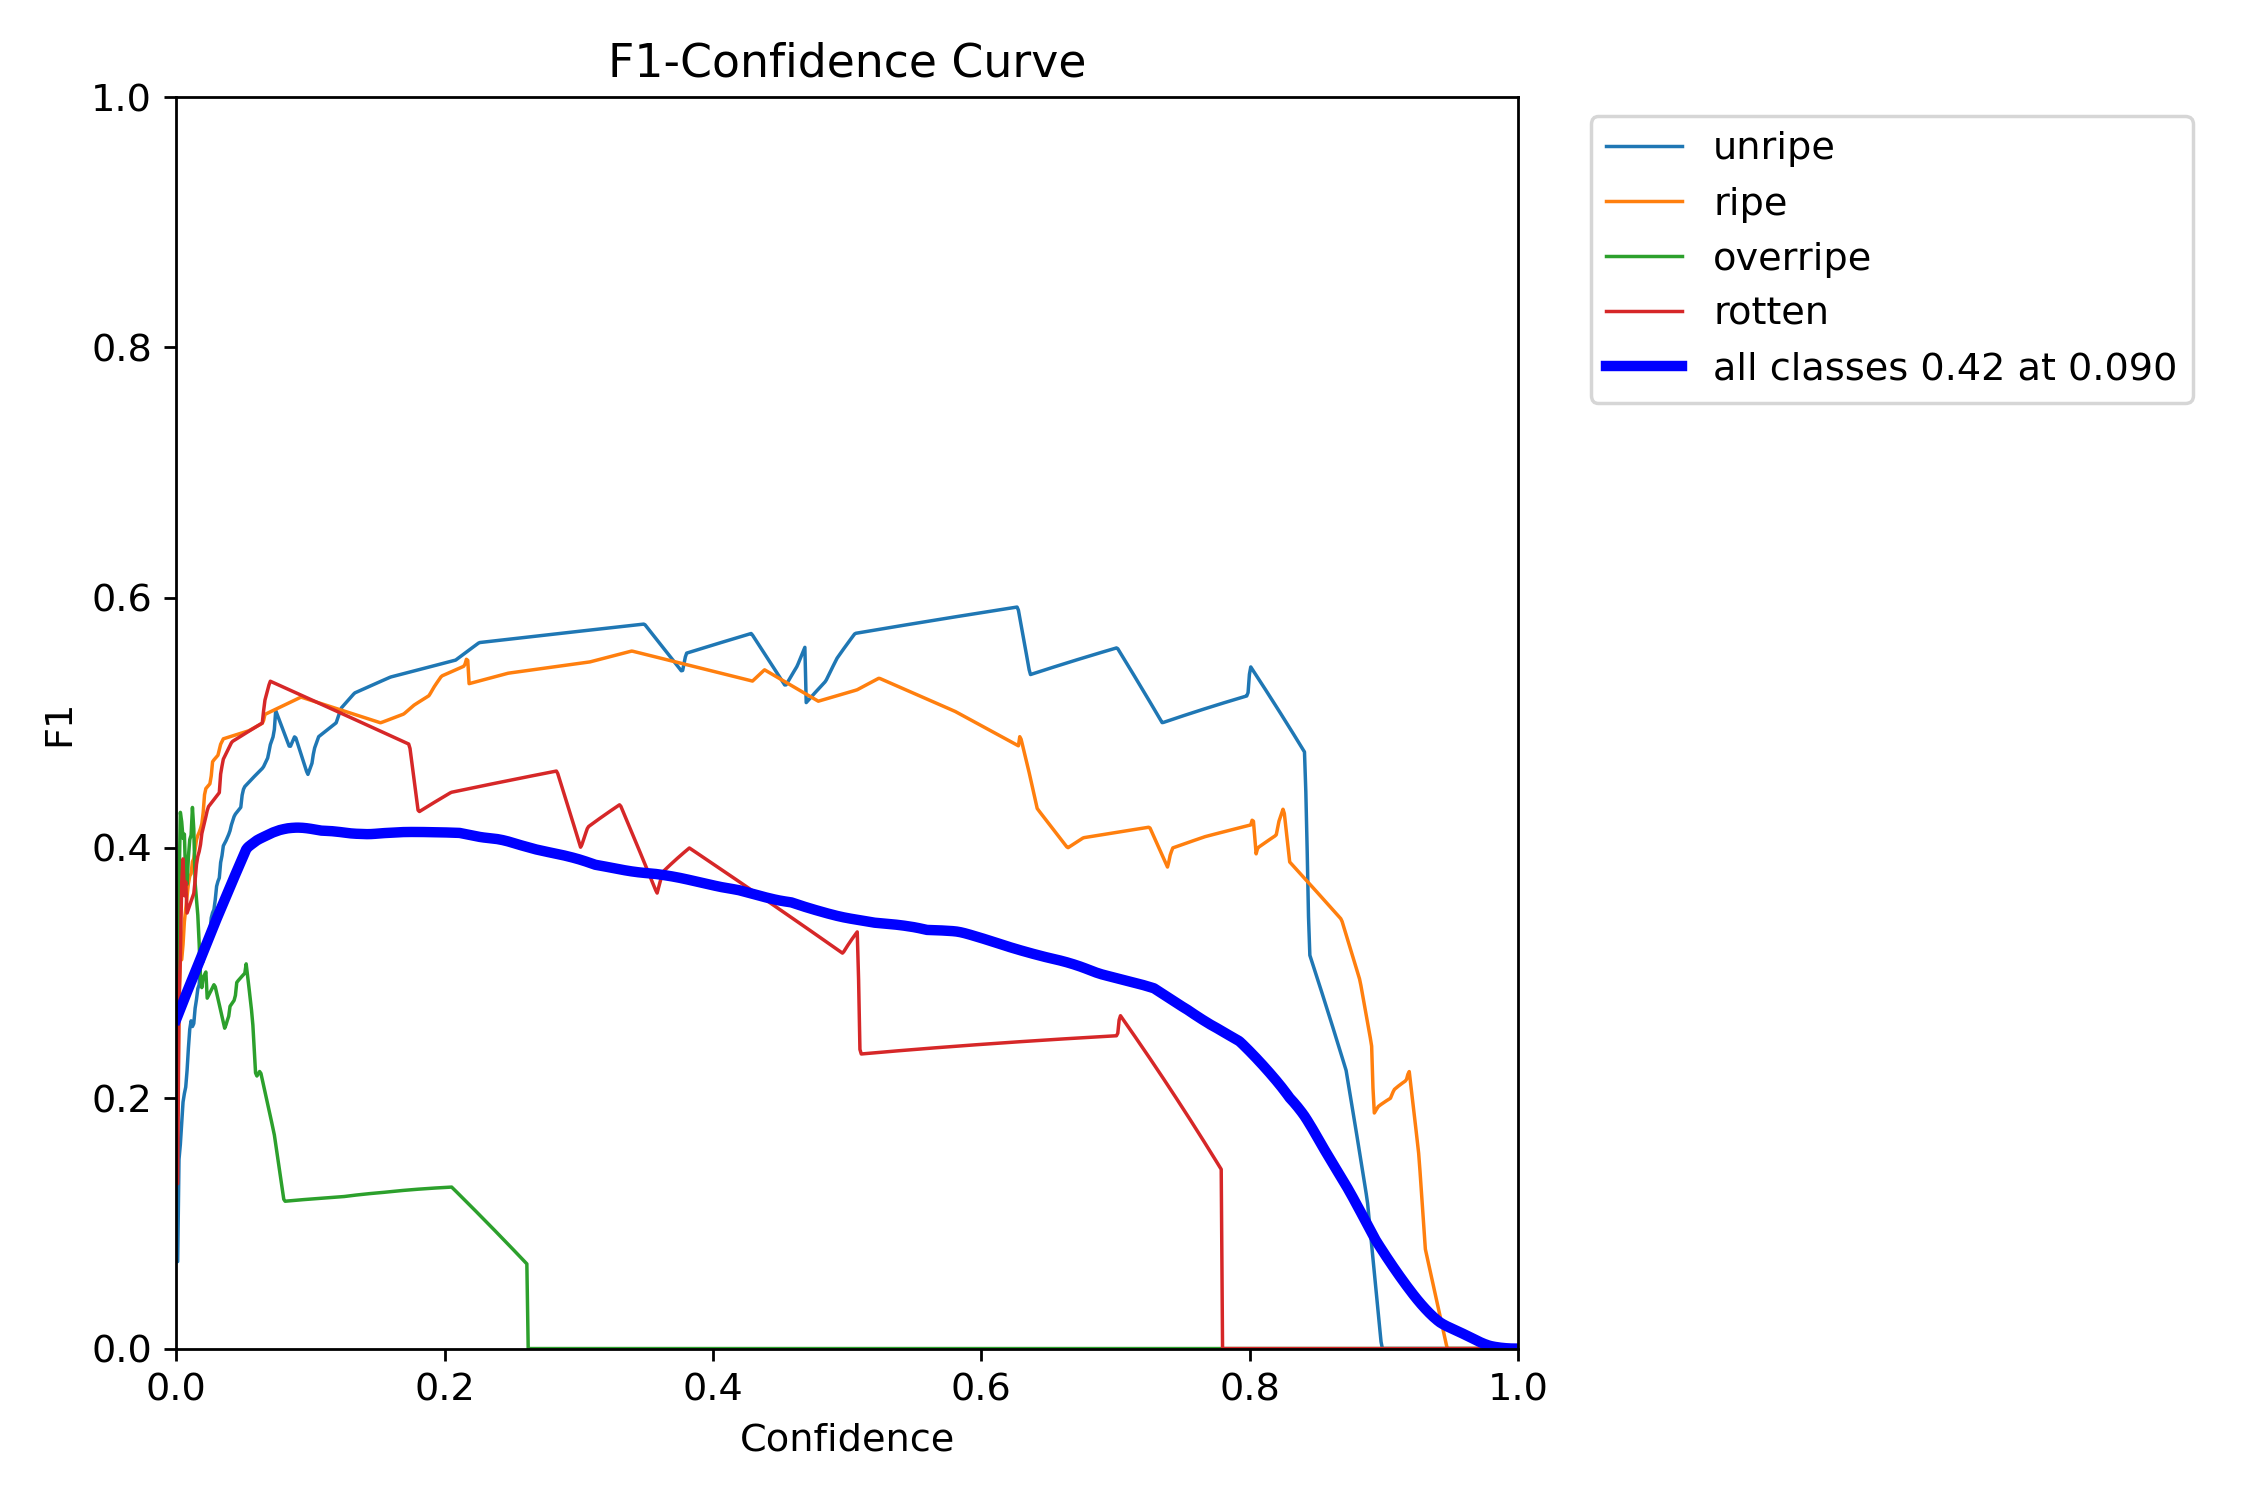

In [42]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/test3/BoxF1_curve.png')

Confusion Matrix

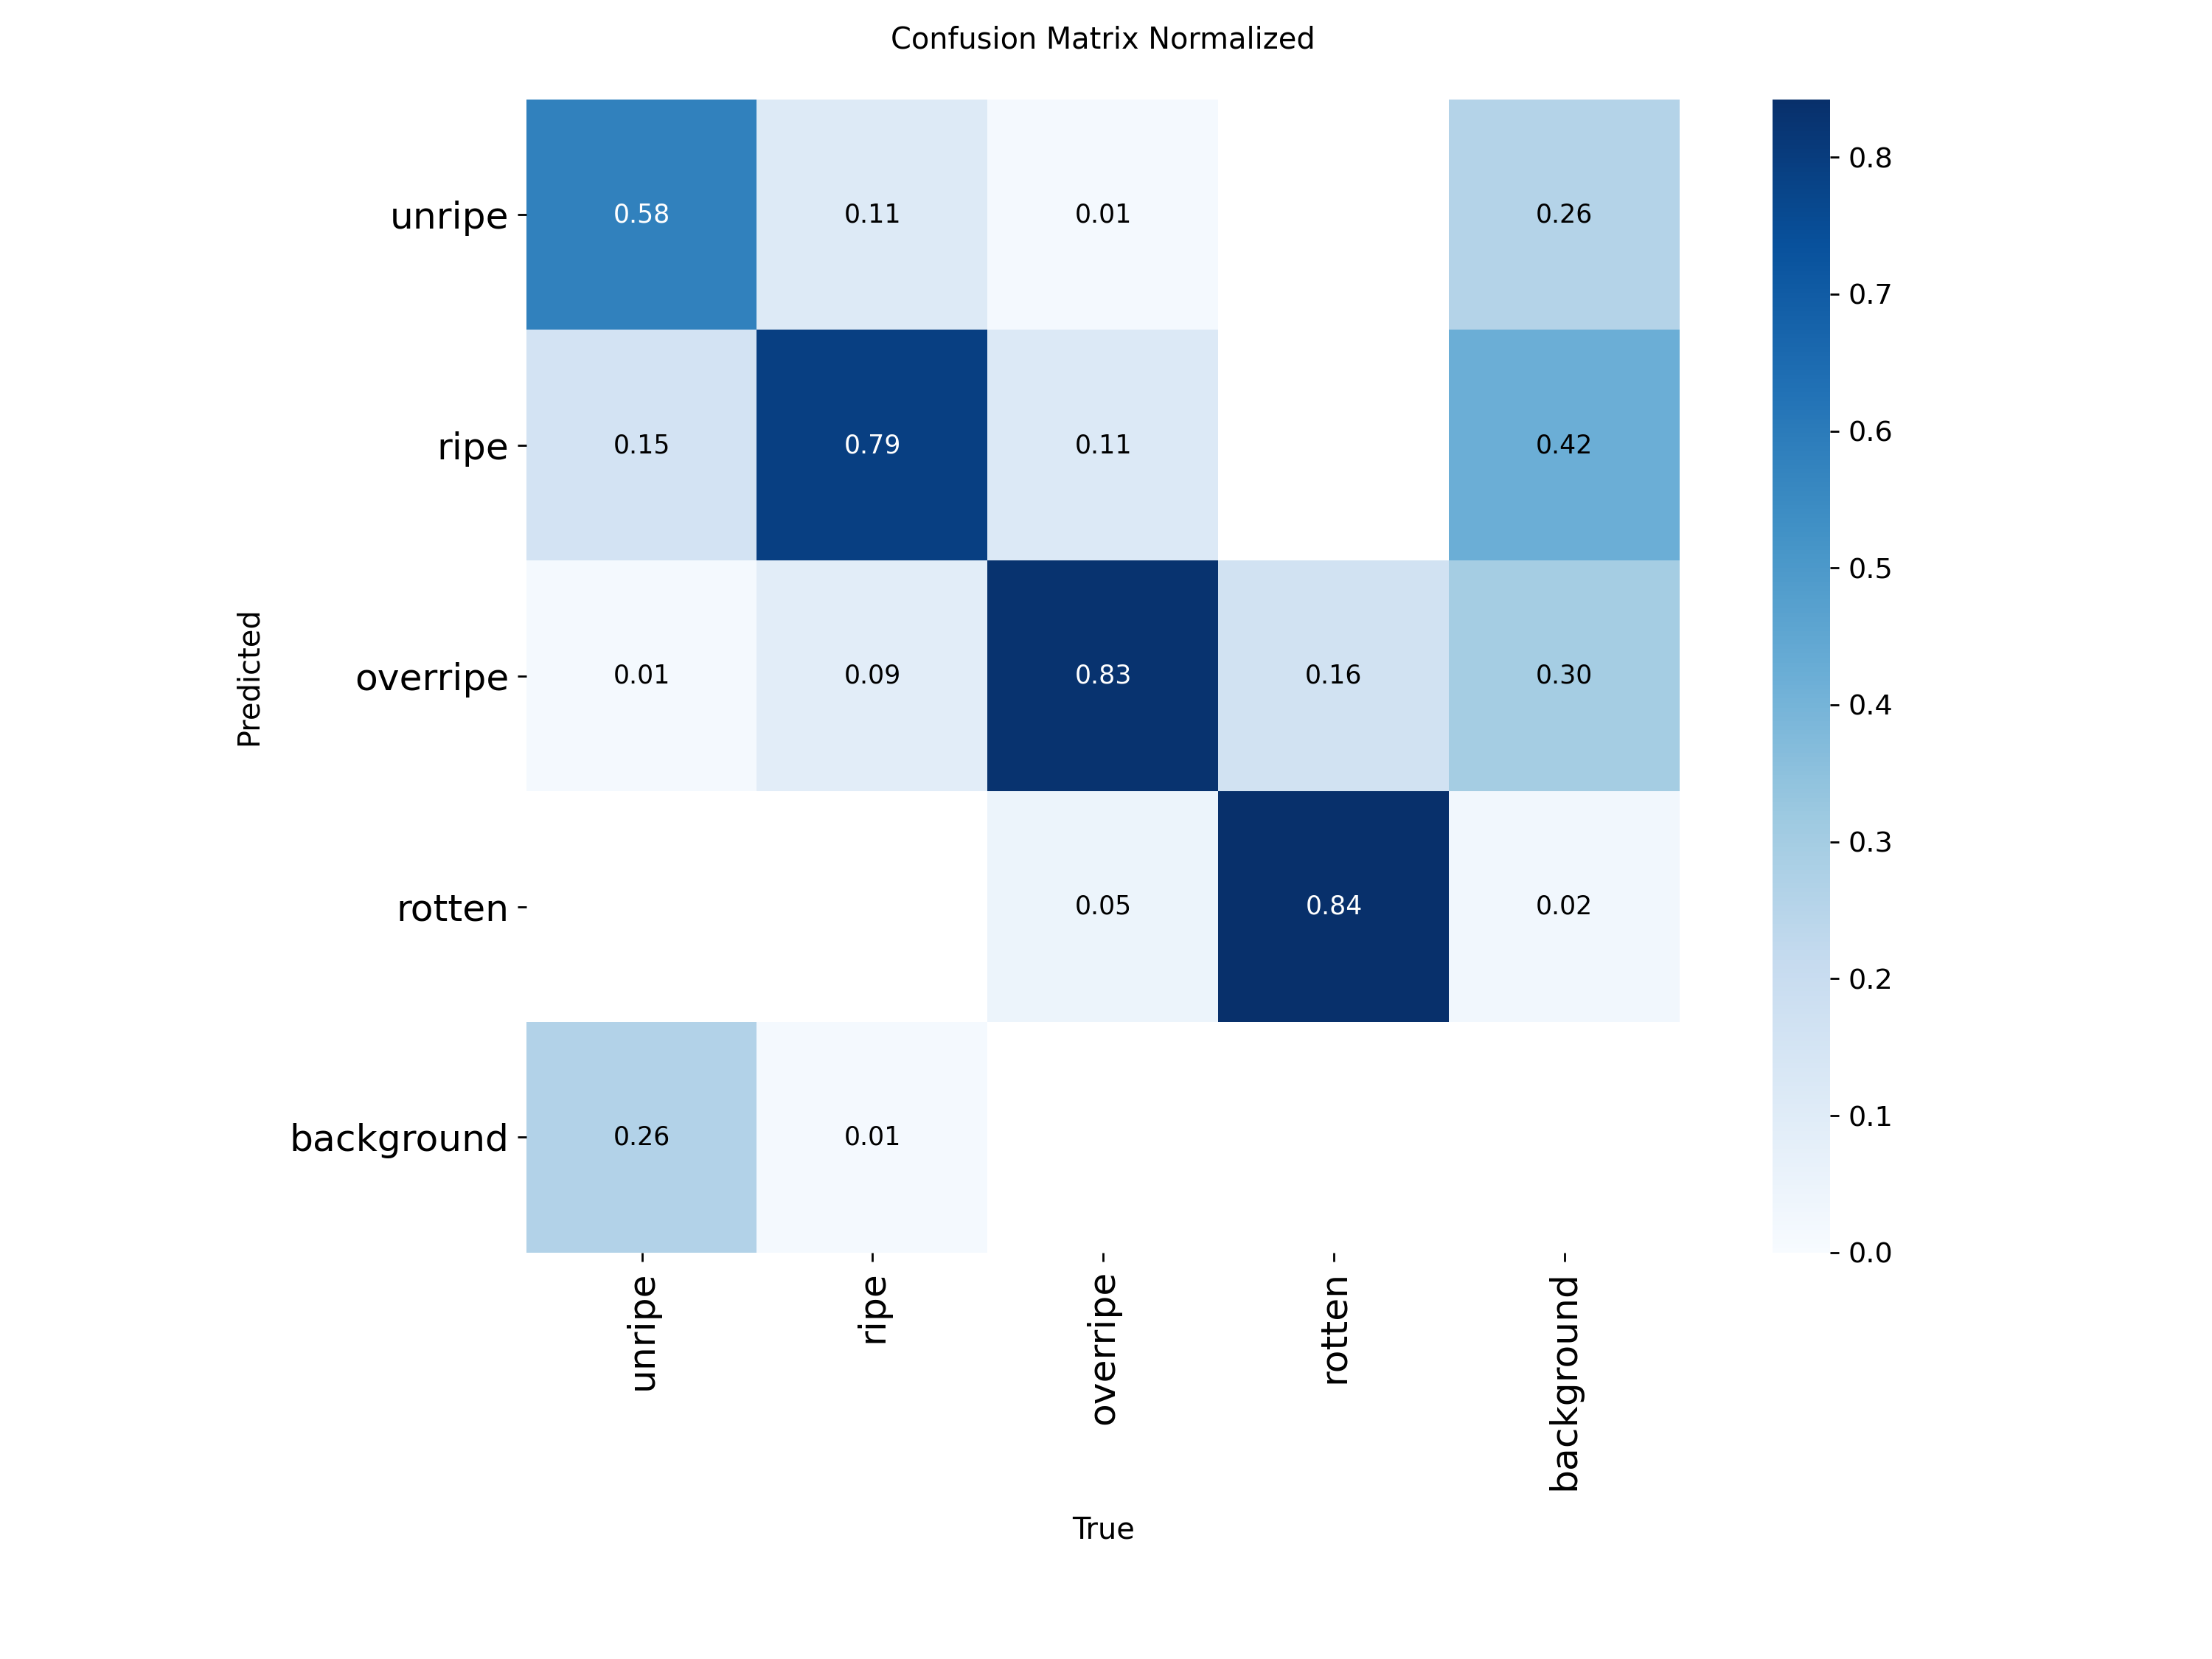

In [43]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train4/confusion_matrix_normalized.png')

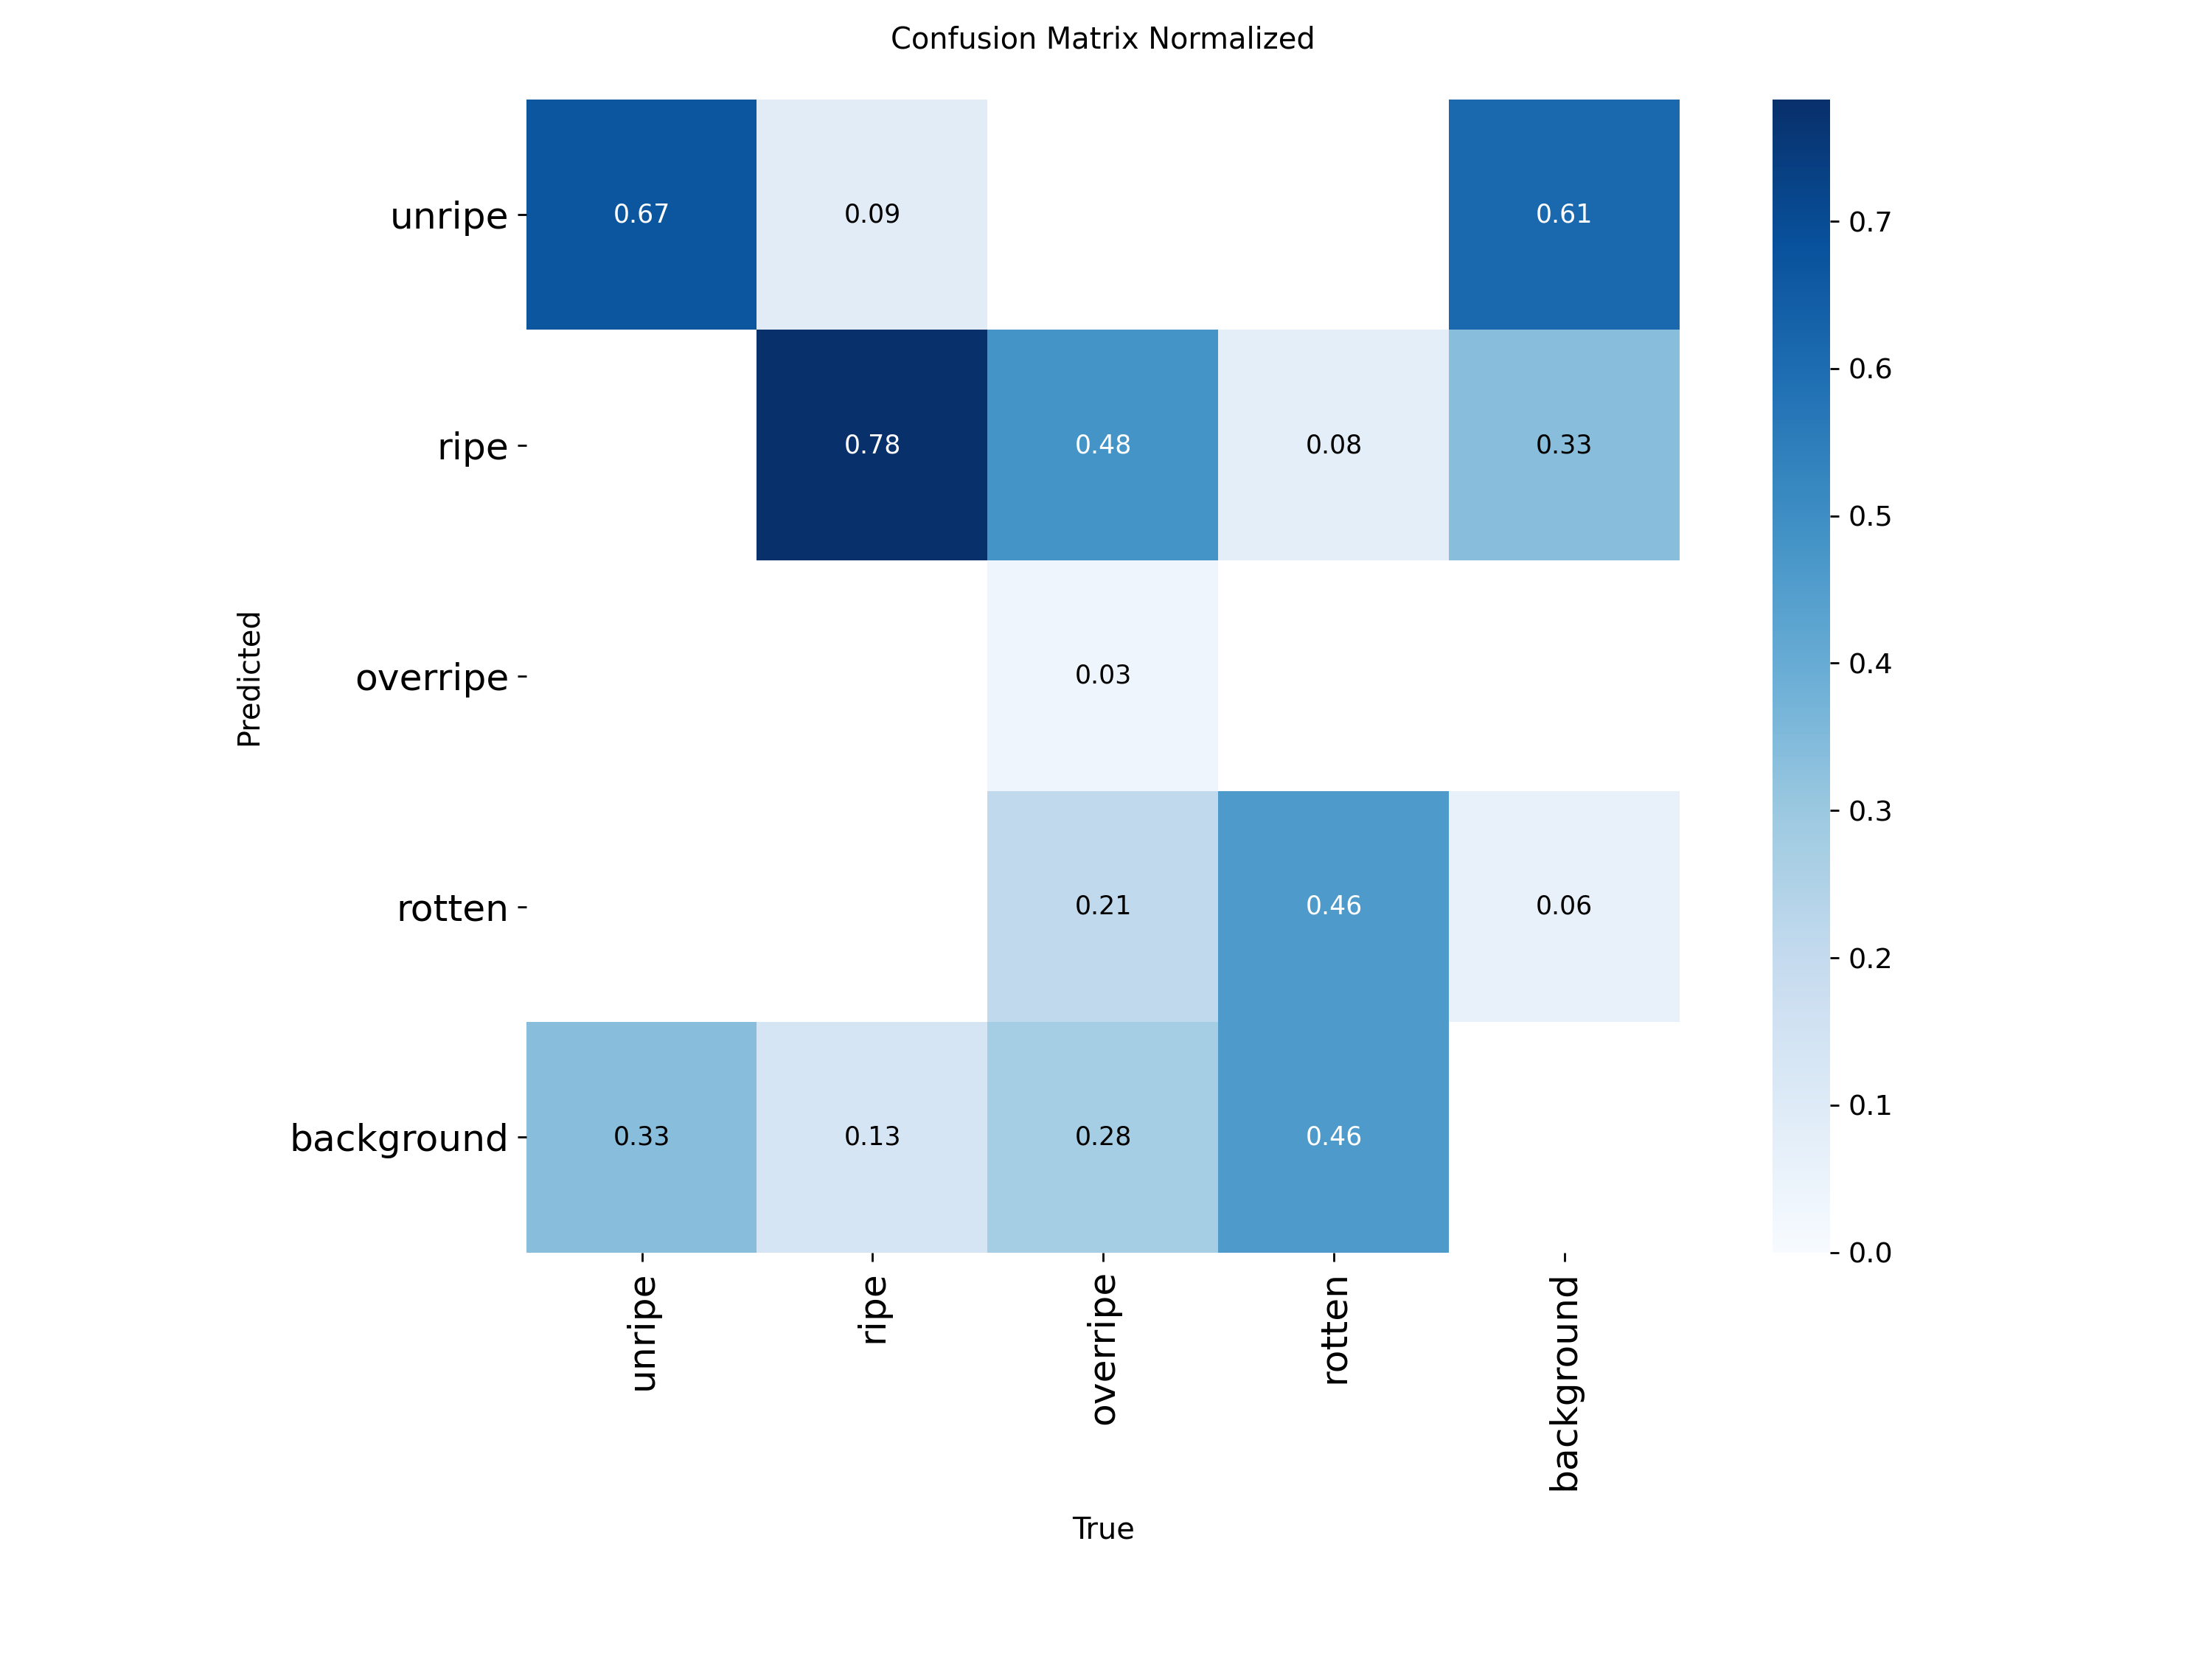

In [44]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/test3/confusion_matrix_normalized.png')

In [45]:
!zip -r /content/runs.zip /content/runs
from google.colab import files
files.download('/content/runs.zip')

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict5/ (stored 0%)
  adding: content/runs/detect/predict5/c5522058ca0e445e964eb0f5500a1372.jpg (deflated 6%)
  adding: content/runs/detect/predict5/labels/ (stored 0%)
  adding: content/runs/detect/predict5/labels/c5522058ca0e445e964eb0f5500a1372.txt (deflated 15%)
  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/BoxR_curve.png (deflated 9%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 8%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 24%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 24%)
  adding: content/runs/detect/val/BoxF1_curve.png (deflated 8%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 15%)
  adding: content/runs/detect/val/BoxPR_curve.png (deflated 13%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 29%)
  adding: content/runs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Class counts per split:
Split: train


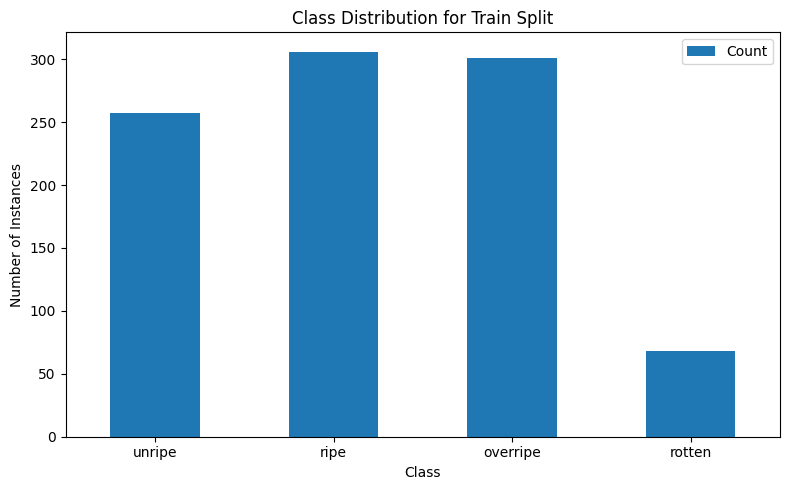

Split: val


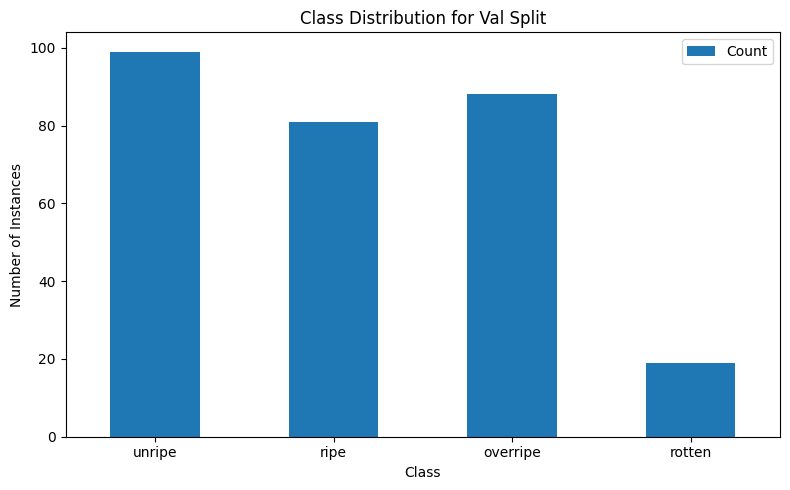

Split: test


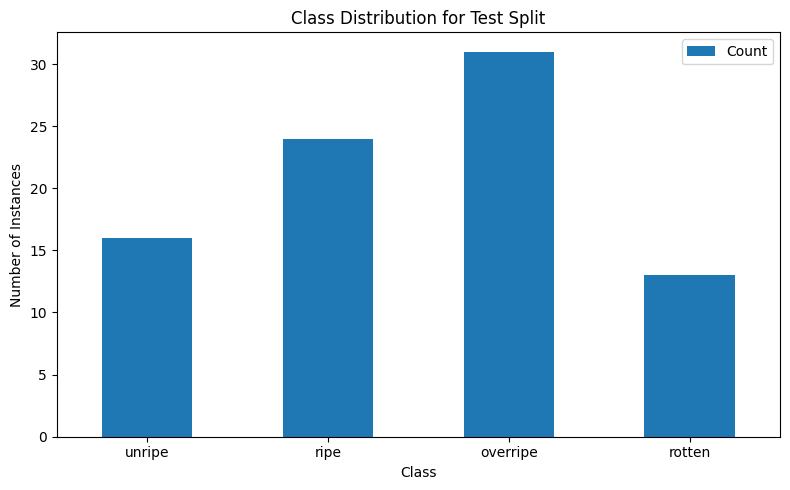

In [46]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

base_label_dir = "/content/drive/MyDrive/ComputerVision/datasets/bananas/labels"
splits = ["train", "val", "test"]

class_counts = defaultdict(lambda: defaultdict(int))

for split in splits:
    label_dir = os.path.join(base_label_dir, split)
    if not os.path.exists(label_dir):
        print(f"Warning: Label directory not found for split '{split}': {label_dir}")
        continue

    for filename in os.listdir(label_dir):
        if filename.endswith(".txt"):
            filepath = os.path.join(label_dir, filename)
            with open(filepath, "r") as f:
                for line in f:
                    parts = line.strip().split()
                    if parts:
                        class_id = int(parts[0])
                        class_counts[split][class_id] += 1

# Assuming the class IDs correspond to your mapped classes:
# 0: unripe, 1: ripe, 2: overripe, 3: rotten
class_names = {
    0: 'unripe',
    1: 'ripe',
    2: 'overripe',
    3: 'rotten'
}

# Define the desired order of class names
desired_order = ['unripe', 'ripe', 'overripe', 'rotten']

print("Class counts per split:")
for split, counts in class_counts.items():
    print(f"Split: {split}")
    # Convert to DataFrame for plotting
    counts_df = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])

    # Rename index to class names
    counts_df = counts_df.rename(index=class_names)

    # Reindex the DataFrame to ensure consistent order
    counts_df = counts_df.reindex(desired_order).fillna(0)


    # Plotting the bar chart for the current split
    counts_df.plot(kind='bar', figsize=(8, 5))
    plt.title(f'Class Distribution for {split.capitalize()} Split')
    plt.xlabel('Class')
    plt.ylabel('Number of Instances')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()